### plot()
- 변수의 형식에 따라 알아 그래프 그림 => generic 함수
- 변수는 수치형이나 명목형 값이어야 함

In [2]:
df <- read.csv('r-ggagi-data/example_studentlist.csv')
str(df)

'data.frame':	17 obs. of  8 variables:
 $ name     : Factor w/ 17 levels "강수친","김길동",..: 2 12 17 6 10 7 1 14 13 9 ...
 $ sex      : Factor w/ 2 levels "남자","여자": 1 2 1 1 2 2 2 2 1 1 ...
 $ age      : int  23 22 24 23 20 21 22 23 23 22 ...
 $ grade    : int  3 2 4 3 1 2 1 1 3 2 ...
 $ absence  : Factor w/ 2 levels "무","유": 2 1 1 1 2 1 1 1 1 1 ...
 $ bloodtype: Factor w/ 4 levels "A","AB","B","O": 4 2 3 2 1 4 4 1 3 3 ...
 $ height   : num  165 170 175 182 168 ...
 $ weight   : num  68.2 53 80.1 85.7 49.5 52 45.3 55 64.2 61.3 ...


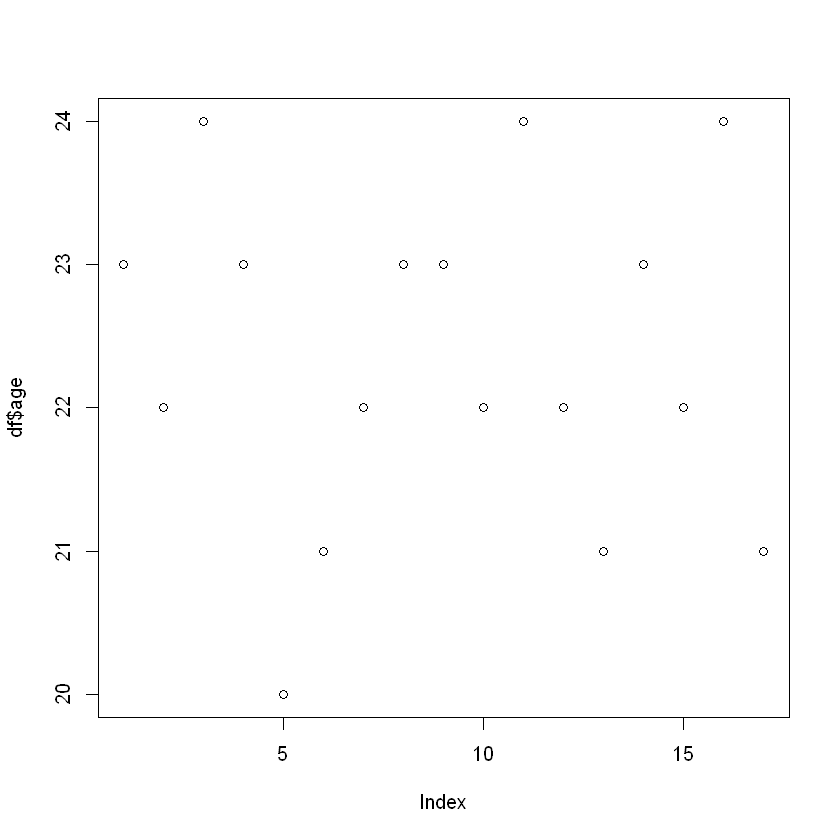

In [3]:
# 변수 1개
plot(df$age) #  첫 번째 행부터 마지막 행까지 산점도로 표시

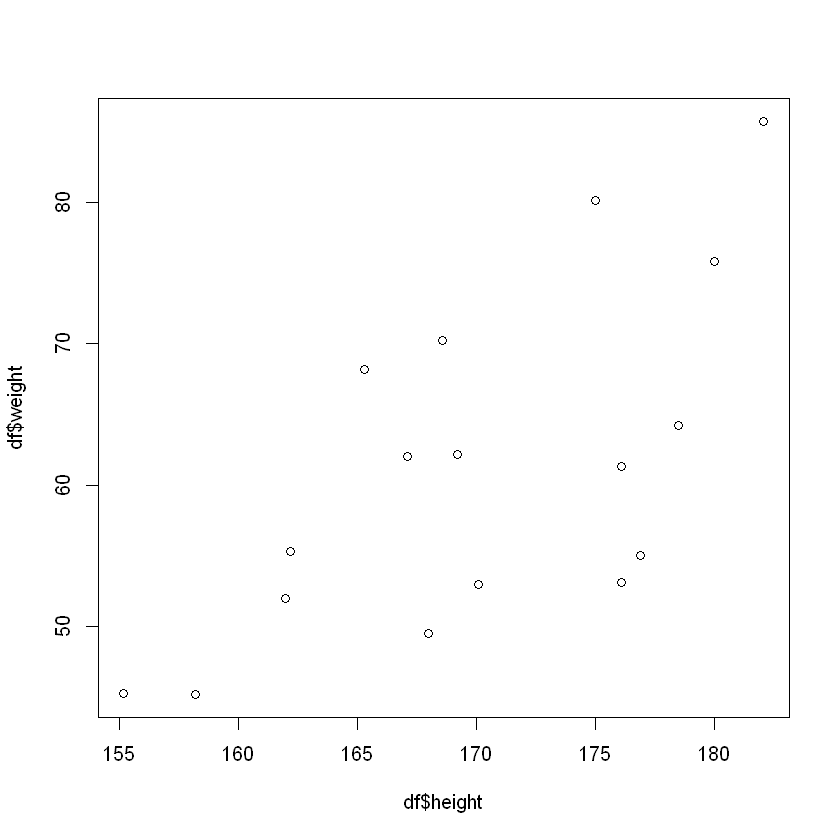

In [4]:
# 변수 2개 - 상관 관계
plot(df$height, df$weight)

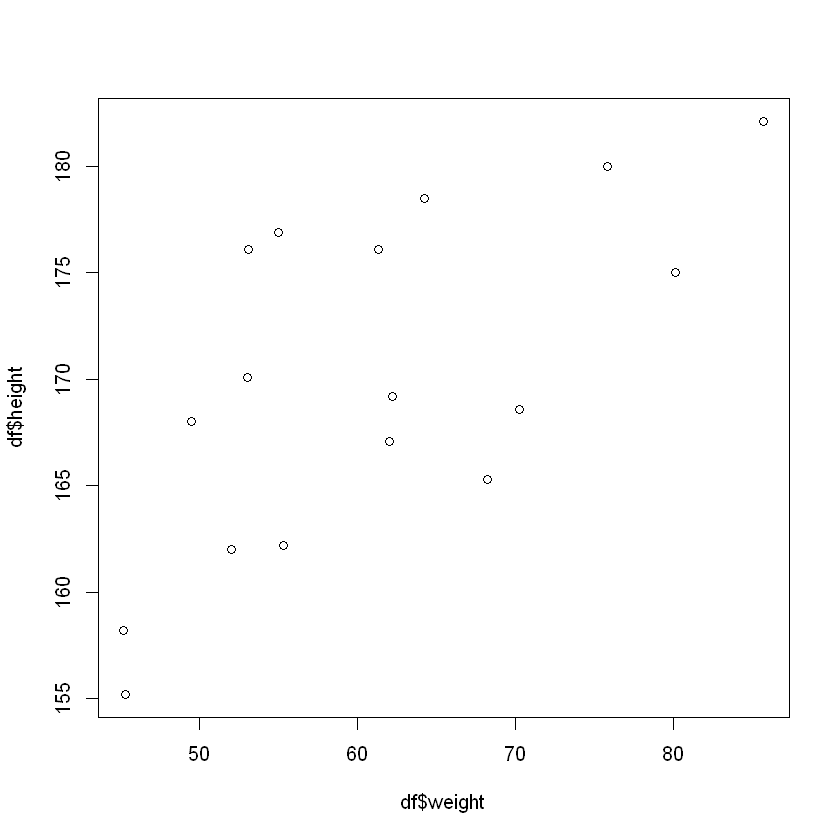

In [5]:
#변수2개 상관관계 (종속변수(y) ~ 독립변수(x))
plot(df$height ~ df$weight)

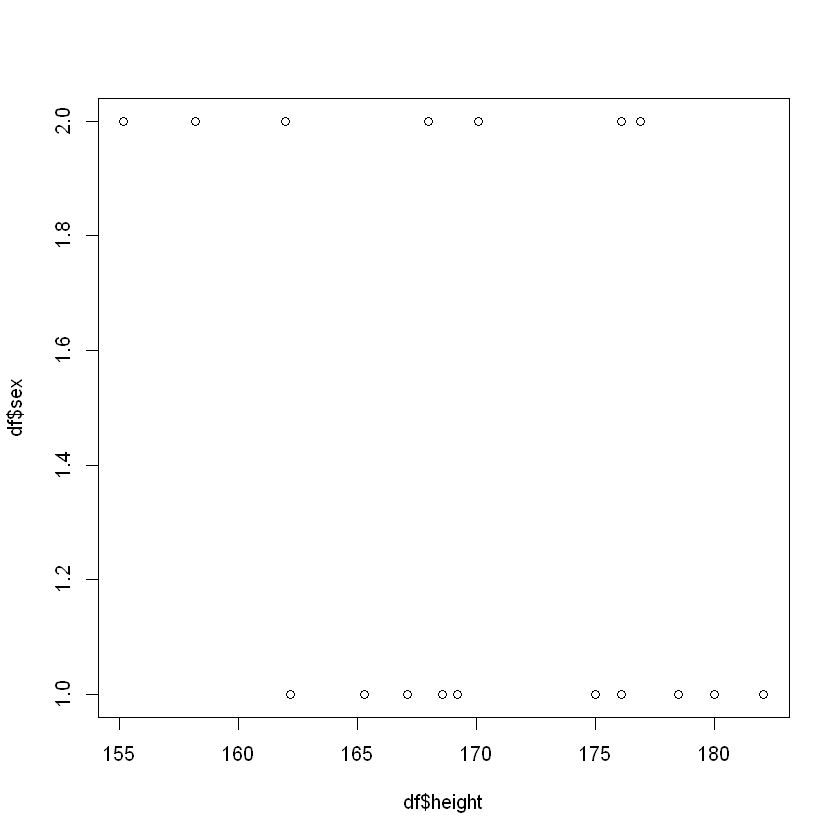

In [6]:
# 수치형 변수, 명목형 변수 1 남자, 2 여자
plot(df$height, df$sex)

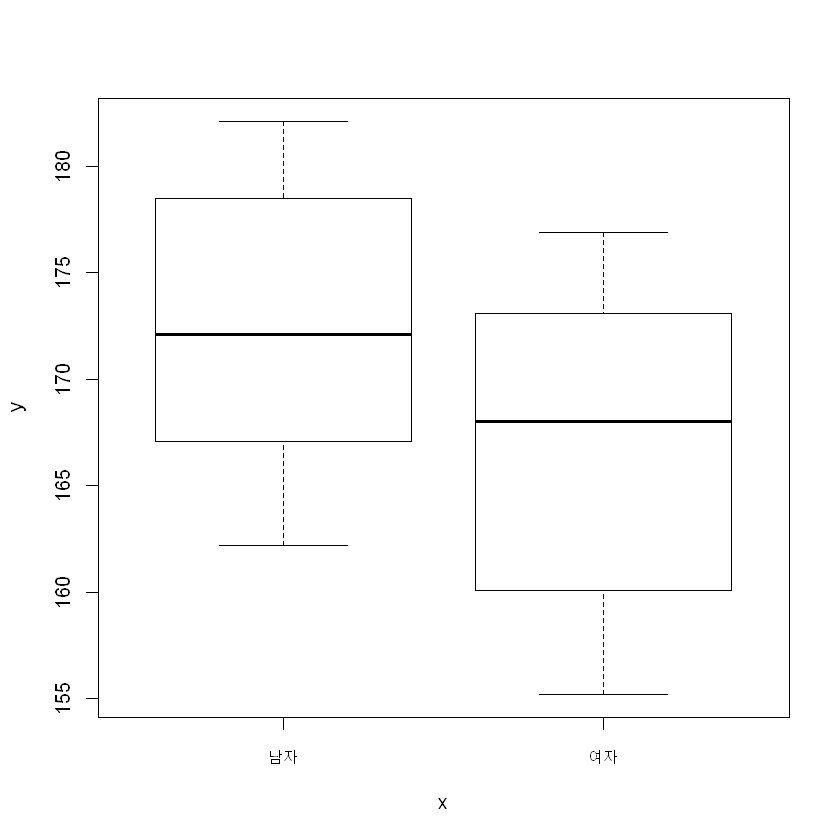

In [7]:
# 명목 형 변수, 수치형 변수 1 남자, 2 여자
plot(df$sex, df$height)

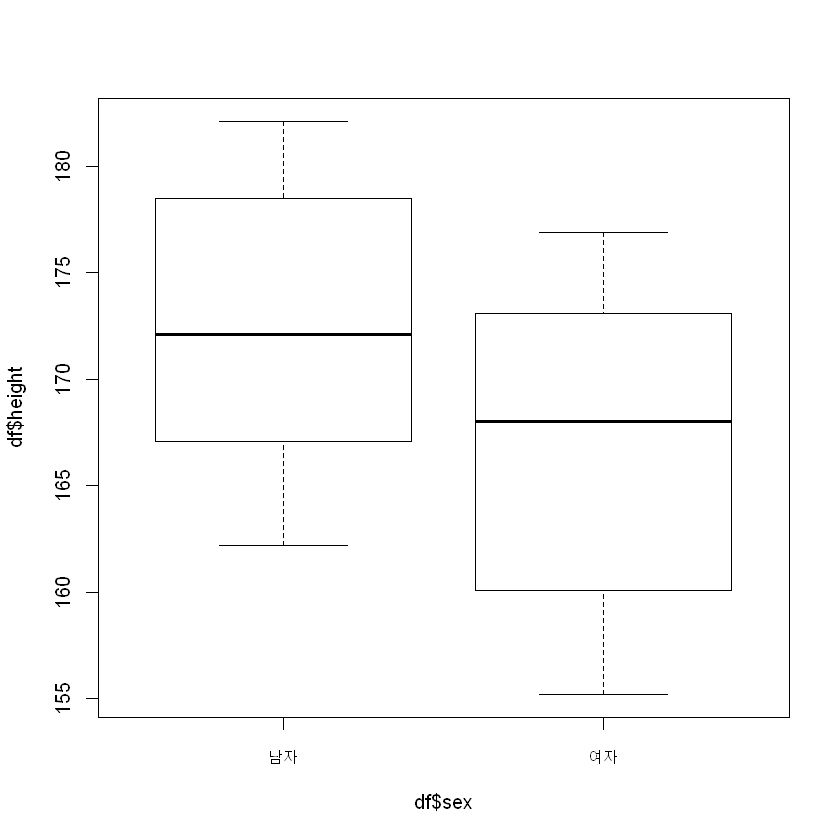

In [8]:
#변수2개 상관관계 (종속변수(y) ~ 독립변수(x)) 뒤집어서씀
plot(df$height~ df$sex)

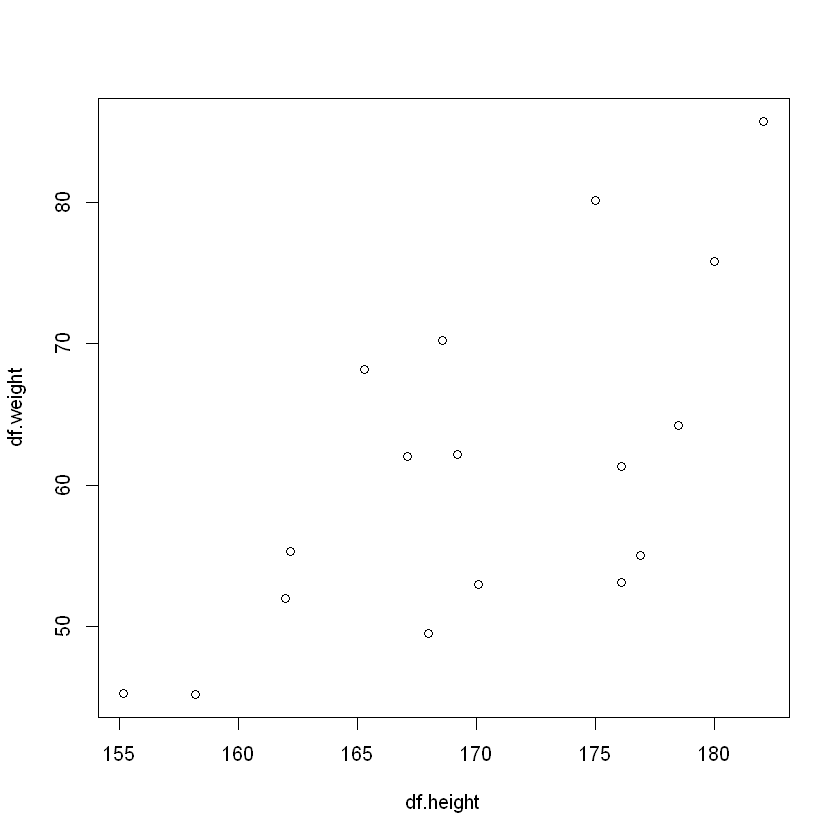

In [9]:
# 데이터 프레임 넣기
df2 <- data.frame(df$height,df$weight)
plot(df2)

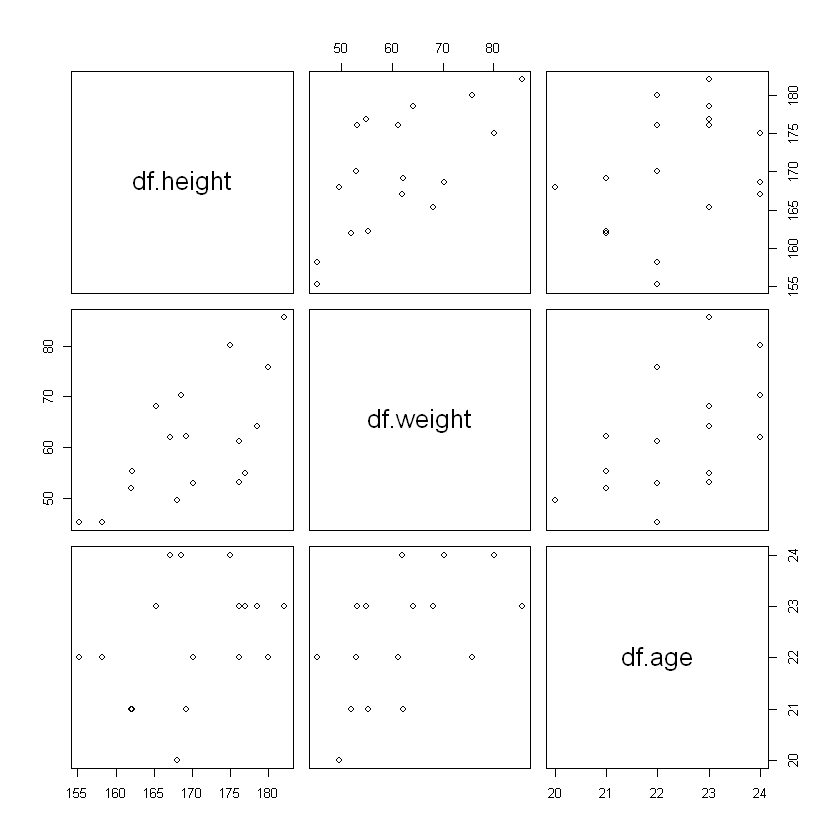

In [11]:
# 데이터 프레임 넣기
df3 <- data.frame(df2,df$age)
plot(df3)

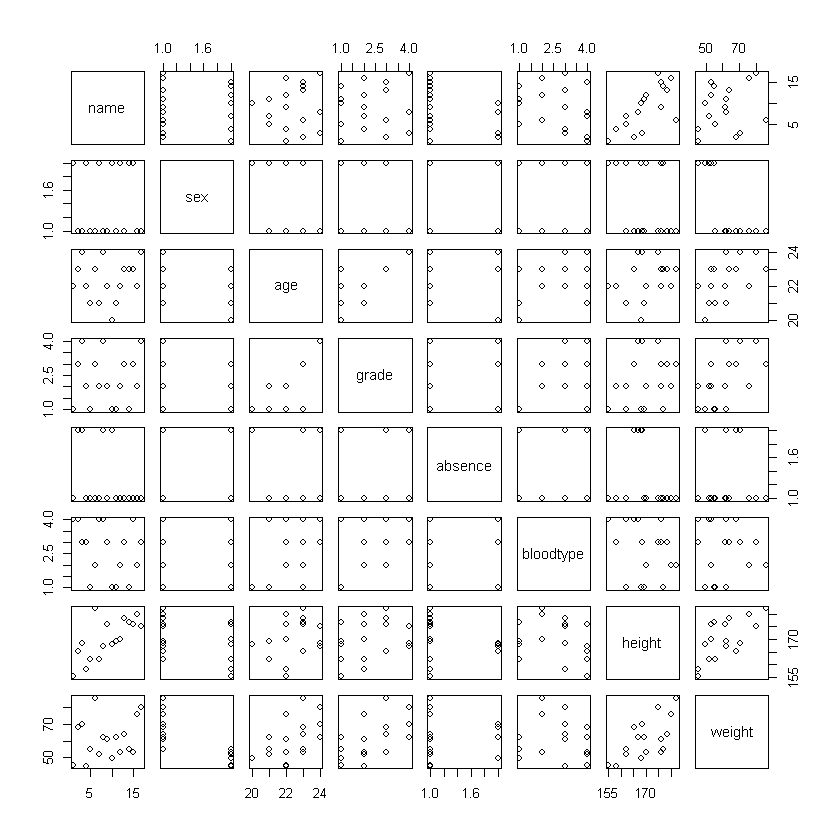

In [12]:
plot(df)

### Level 별 그래프 보기m

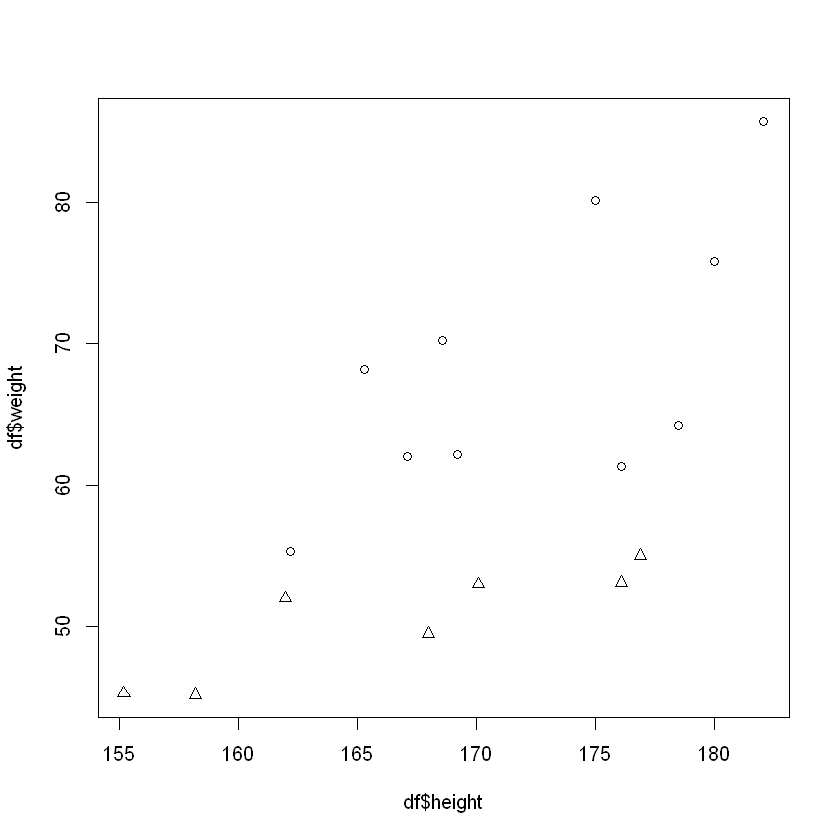

In [13]:
# 성별 별도 표시
plot(df$weight~df$height, pch = as.integer(df$sex))

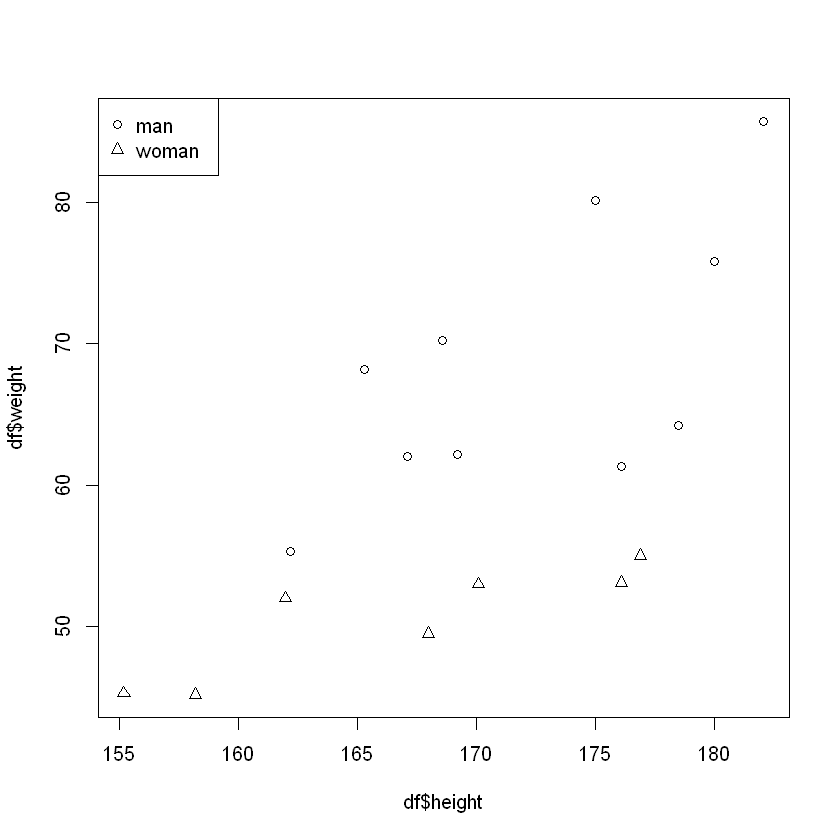

In [14]:
# 성별 별도 표시 - 레전드 추가
plot(df$weight~df$height, pch = as.integer(df$sex))
legend('topleft', c('man', 'woman'), pch=df$sex)

#### 조건화 그래프 coplot()
- 명목형 변수 보기 편함

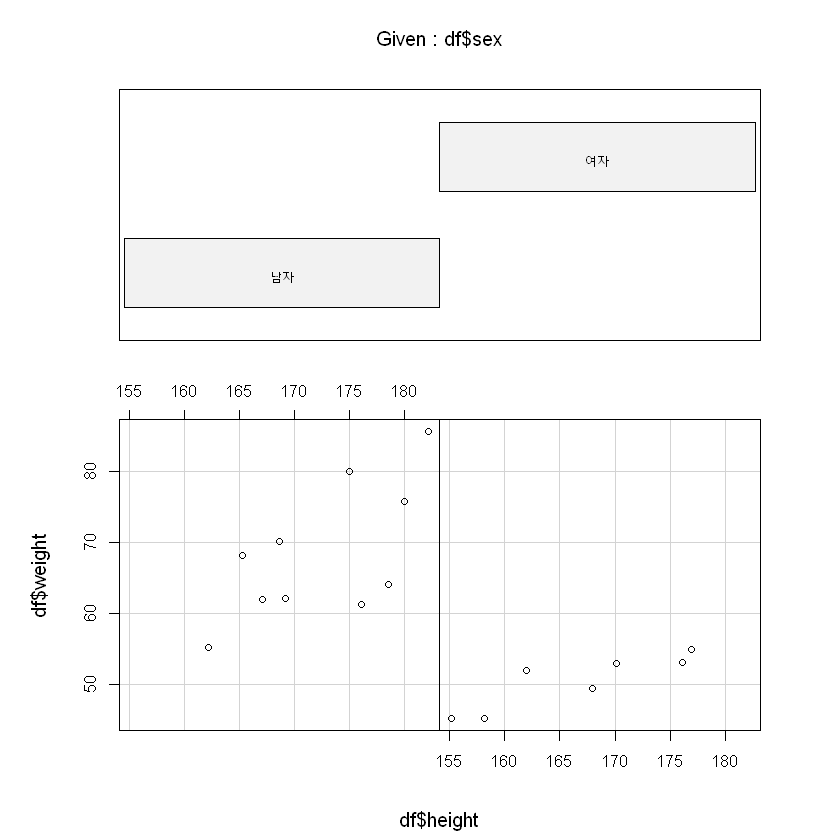

In [15]:
# 성별에 따른 키와 몸무게
coplot(df$weight ~ df$height | df$sex)

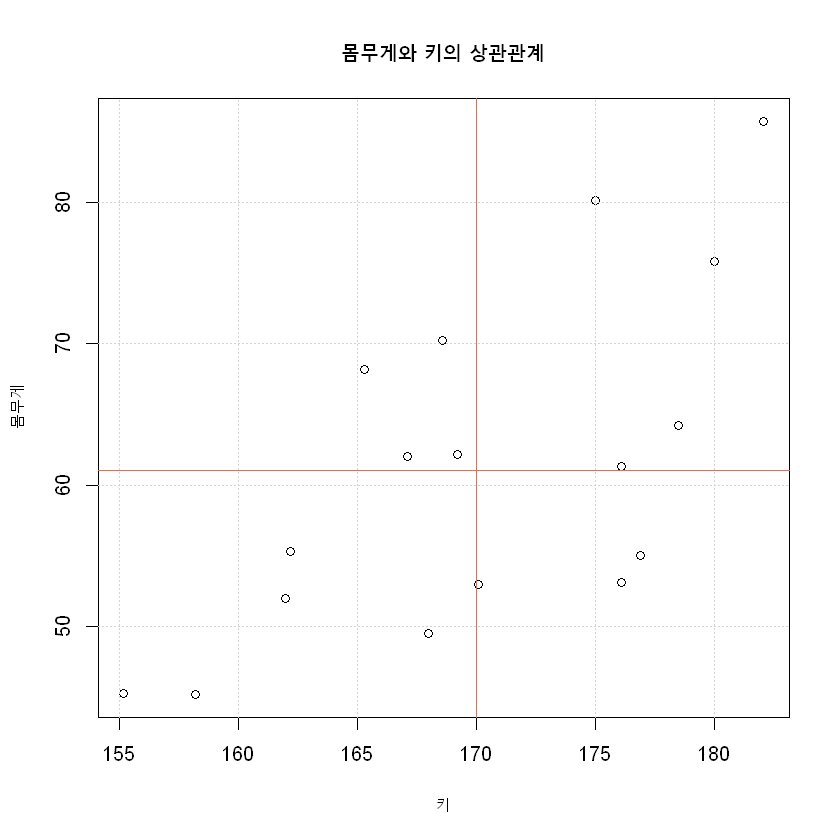

In [17]:
plot(df$weight ~ df$height, ann = F)
title(main = '몸무게와 키의 상관관계')
title(ylab = '몸무게')
title(xlab = '키')
grid() #격자추가
abline(v=mean(df$height),h=mean(df$weight), col='tomato')

barplot() - 빈도수 그래프

In [18]:
blood_type <- table(df$bloodtype)
blood_type


 A AB  B  O 
 4  3  5  5 

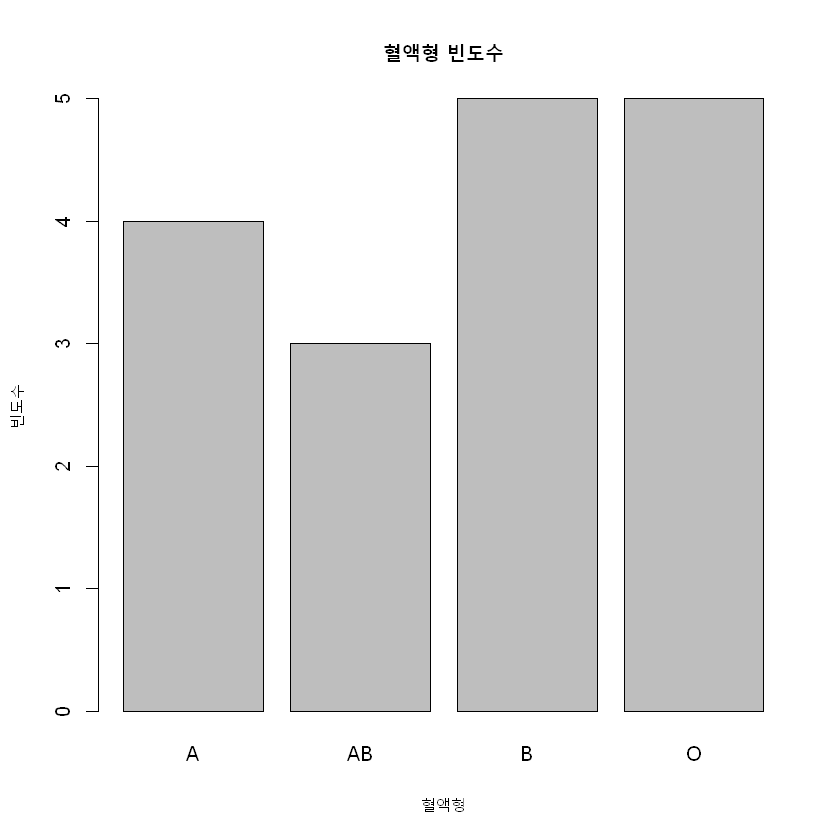

In [19]:
barplot(blood_type)
title(main = '혈액형 빈도수')
title(xlab = '혈액형')
title(ylab = '빈도수')

In [20]:
h_b <- tapply(df$height, df$bloodtype, mean)
h_b

A      AB       B       O 
169.075 177.400 171.280 165.140

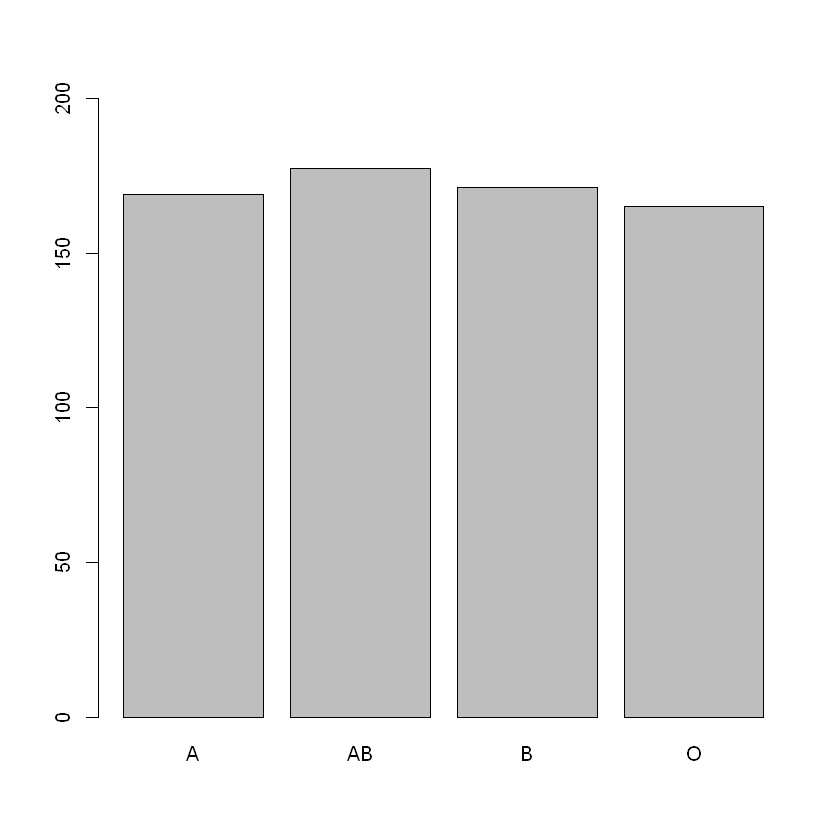

In [23]:
barplot(h_b, ylim = c(0,200))

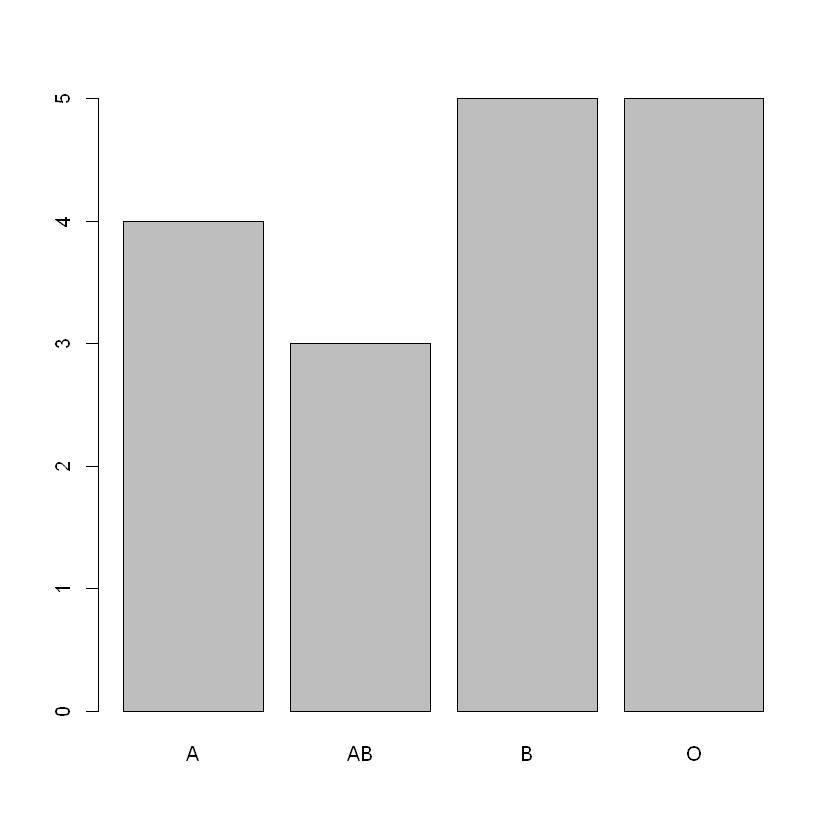

In [24]:
plot(df$bloodtype)

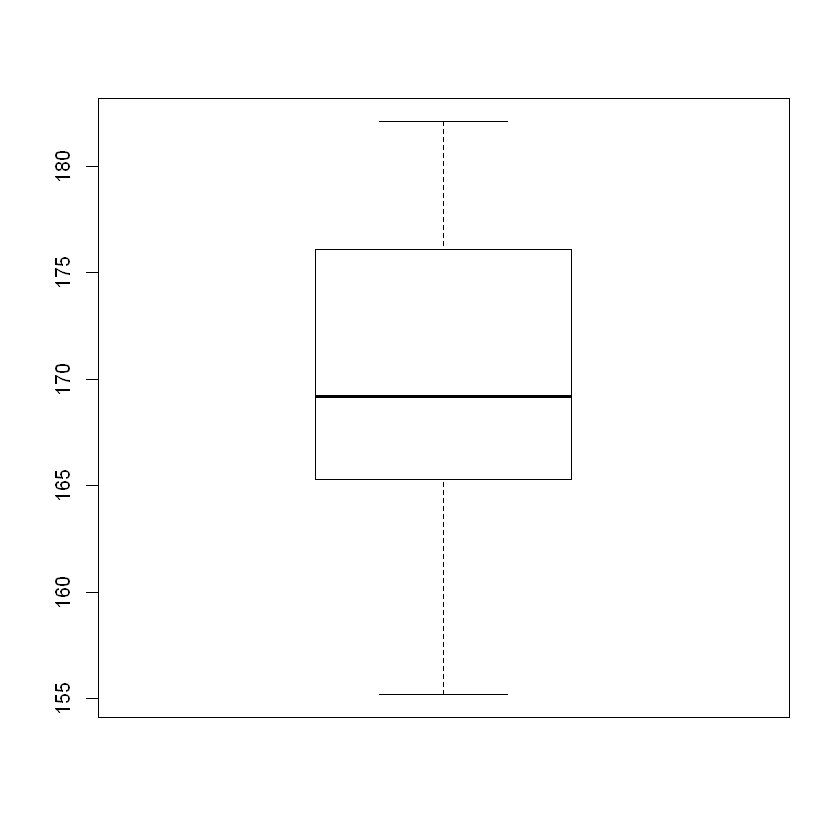

In [25]:
boxplot(df$height)

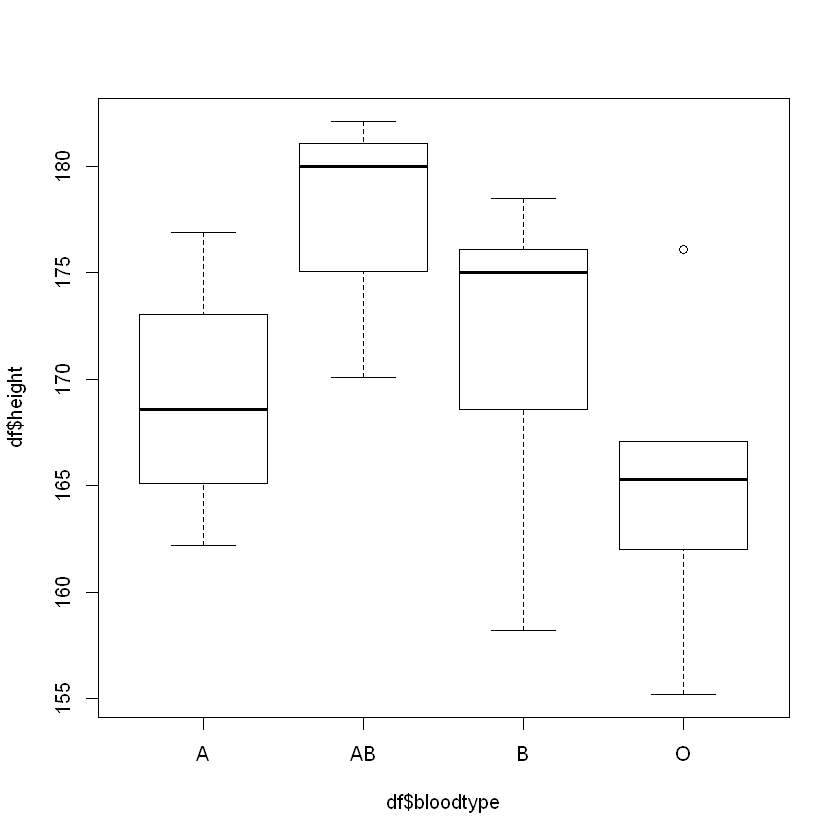

In [26]:
#혈액형별 boxplot
boxplot(df$height ~ df$bloodtype)

In [27]:
subset(df,subset=(df$bloodtype=='O'))

,name,sex,age,grade,absence,bloodtype,height,weight
1,김길동,남자,23,3,유,O,165.3,68.2
6,박미희,여자,21,2,무,O,162.0,52.0
7,강수친,여자,22,1,무,O,155.2,45.3
11,박수호,남자,24,4,유,O,167.1,62.0
14,이희진,여자,23,3,무,O,176.1,53.1


hist()
- x축은 반드시 수치형 연속형 변수
- 계급을 정하고 계급의 도수를 그래프로 나타낸것
- 상대도수밀도 = 상대도수 / 계급

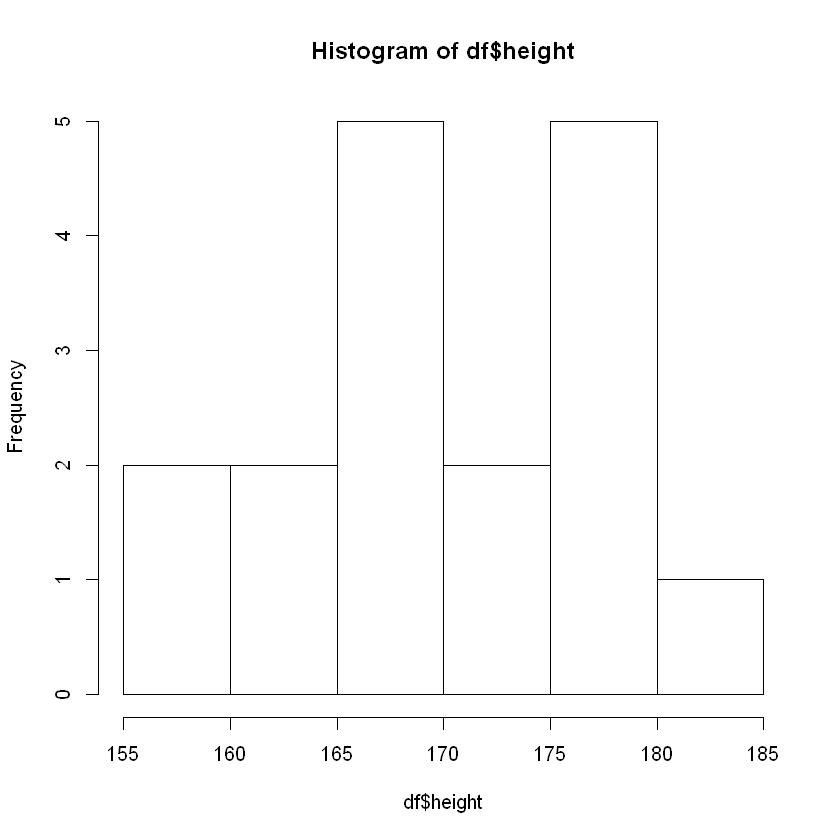

In [28]:
hist(df$height)

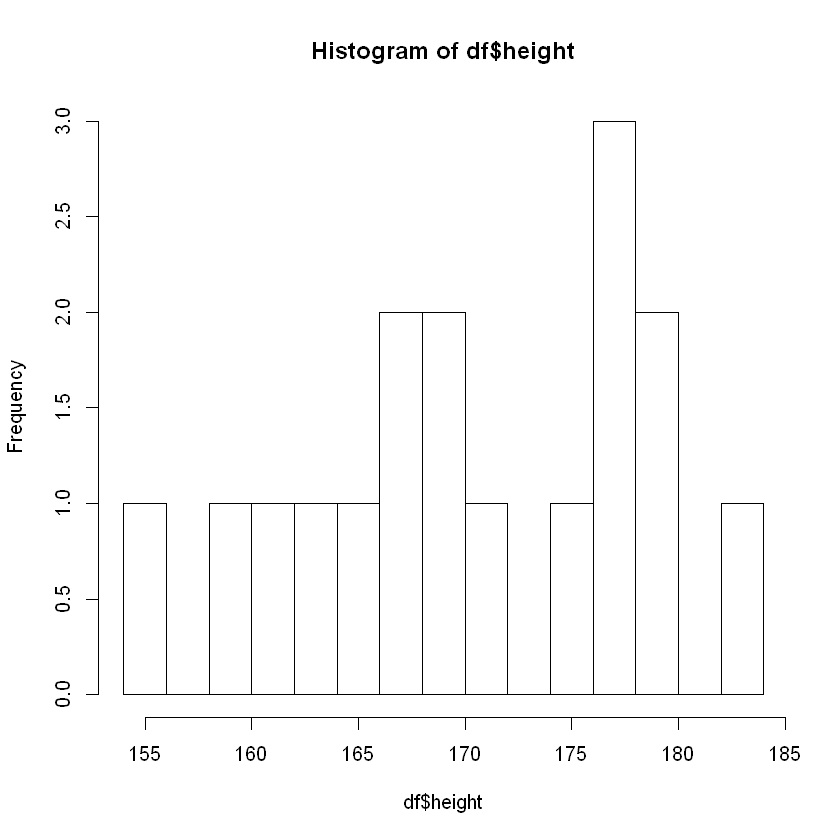

In [29]:
hist(df$height, breaks = 10)

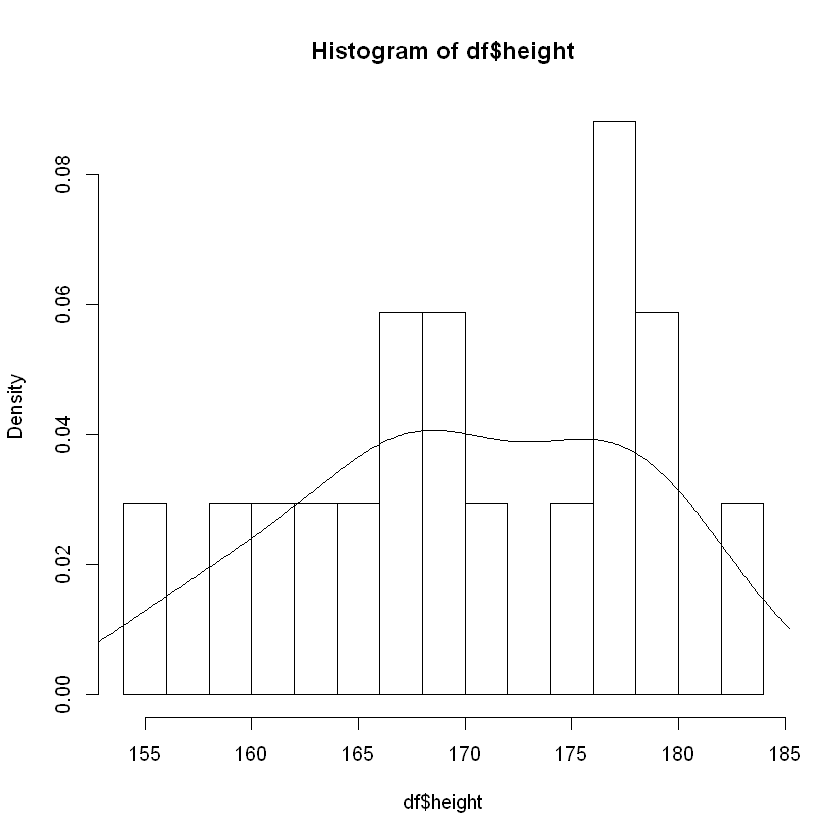

In [30]:
hist(df$height, breaks = 10, prob = T)
lines(density(df$height))

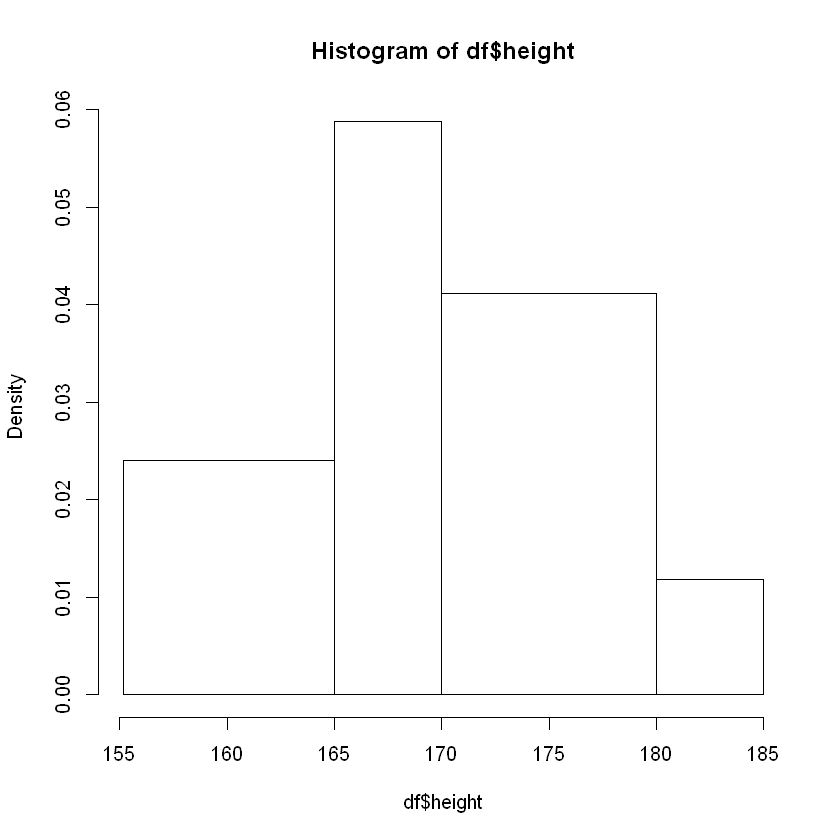

In [31]:
# 계급 수동 설정 => 상대밀도함수(Density) 로 바뀜
diff_point <- c(min(df$height),165, 170, 180, 185)
hist(df$height, breaks = diff_point)

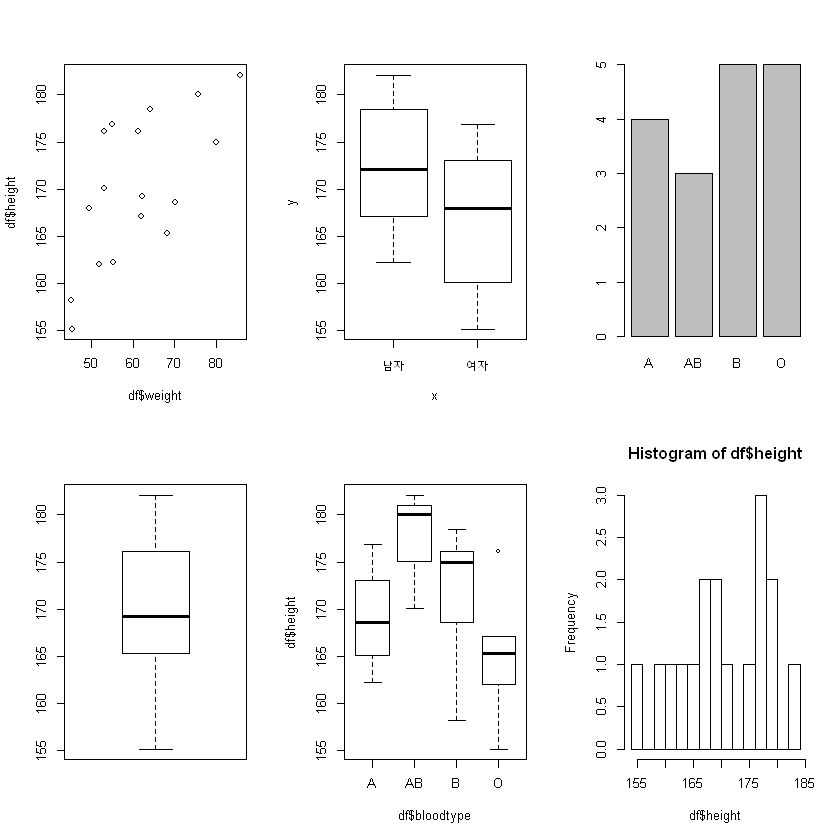

In [34]:
par(mfrow = c(2,3))
plot(df$weight, df$height)
plot(df$sex, df$height)
barplot(table(df$bloodtype))
boxplot(df$height)
boxplot(df$height ~ df$bloodtype)
hist(df$height, breaks = 10)

In [35]:
par(mfrow = c(1,1))

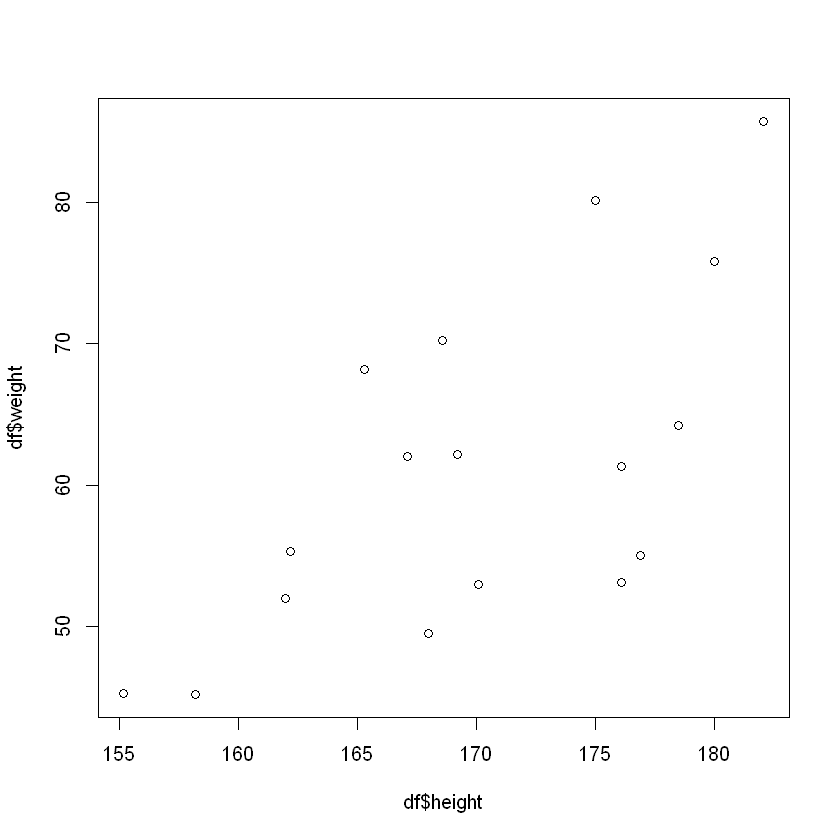

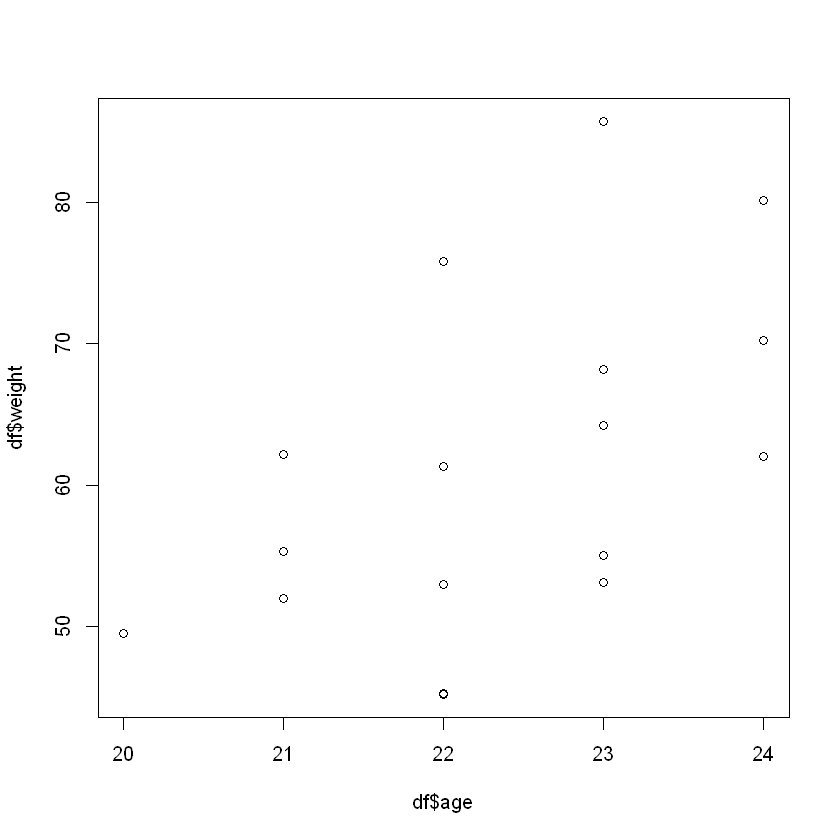

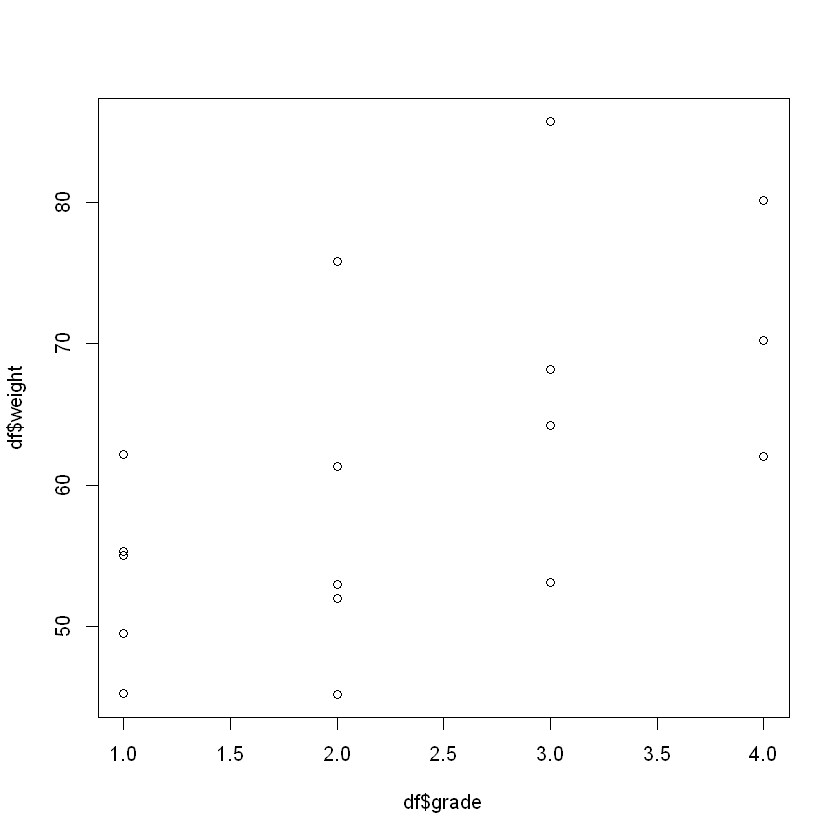

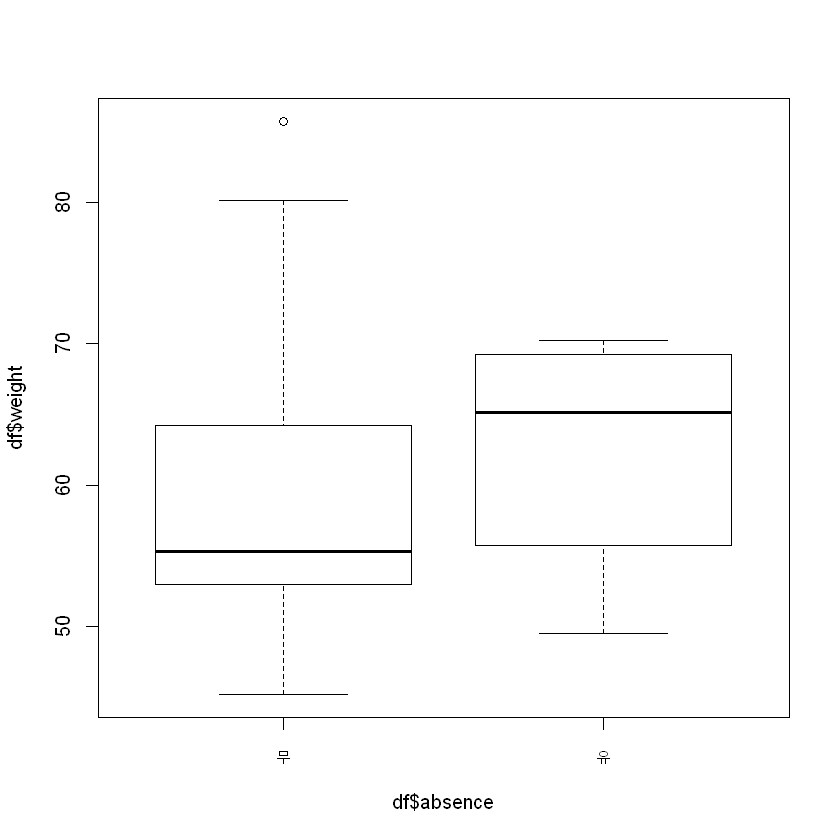

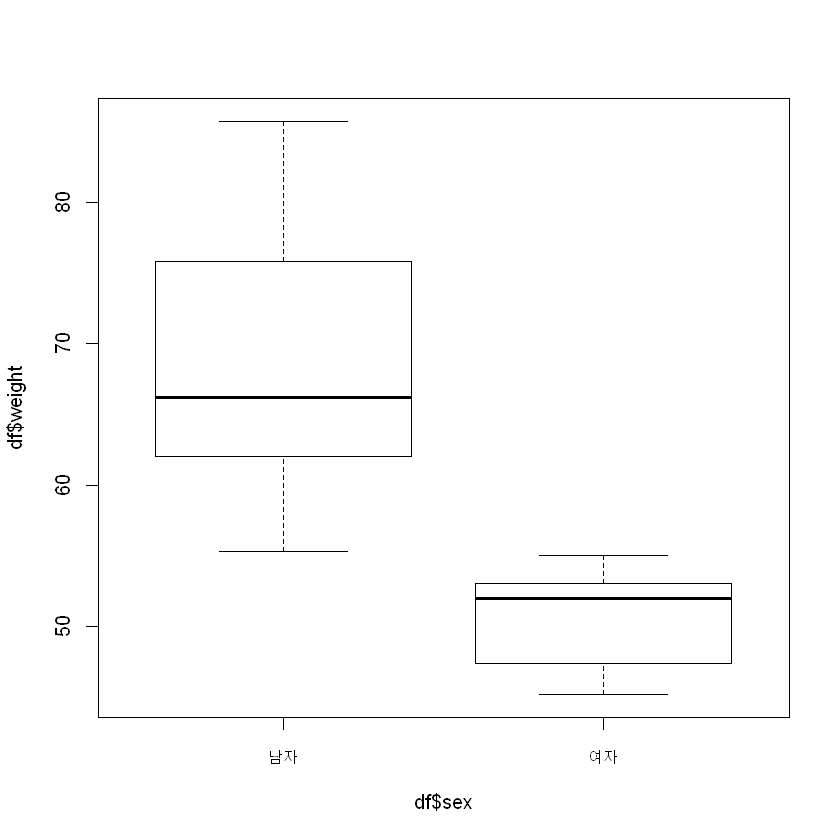

In [36]:
plot(df$weight~df$height + df$age + df$grade + df$absence + df$sex)

### R 기본 그래프 겹처 나타내기
- linse()를 이용해서 라인 그래프만 겹칠 수 있음

In [39]:
# 시계열 변수 임의로 만들기
runif(30) # 난수 발생
round(runif(30)*100) # 소수점 처리
ts1 <- c(round(runif(30)*100))
ts2 <- c(round(runif(30)*100))

[1] 0.33937049 0.59816545 0.82949917 0.48955892 0.51960357 0.69408955
 [7] 0.55999751 0.36170446 0.79873817 0.46902078 0.39955317 0.98394216
[13] 0.94712506 0.75930120 0.46356285 0.57740721 0.53194768 0.06667513
[19] 0.15456115 0.74194026 0.17274064 0.44722980 0.79059097 0.52534240
[25] 0.54764362 0.79532968 0.53706431 0.81120511 0.48594235 0.98997387

[1]  5 36 65 24  3 52 86 56 23 73 19 36  1 88 42 12 37 38 15 80 48  6 90 38 68
[26] 63 60 13 14 50

In [40]:
ts1
ts2

[1] 31 61 74 77  4 85 50 69 25  2 98 58 38 19 23 37 67 12 21 27 88 57 50 60 96
[26] 20 21 49  4  7

[1] 40 70 64 38 96 15 83 98 51 28  6 27 14 15 16 31  4 10 69 12 79  5 32 59  7
[26]  3 44 76 43 90

In [42]:
# 자료 정렬
ts1 <- sort(ts1, decreasing = F)
ts2 <- sort(ts2, decreasing = F)
ts1
ts2

[1]  2  4  4  7 12 19 20 21 21 23 25 27 31 37 38 49 50 50 57 58 60 61 67 69 74
[26] 77 85 88 96 98

[1]  3  4  5  6  7 10 12 14 15 15 16 27 28 31 32 38 40 43 44 51 59 64 69 70 76
[26] 79 83 90 96 98

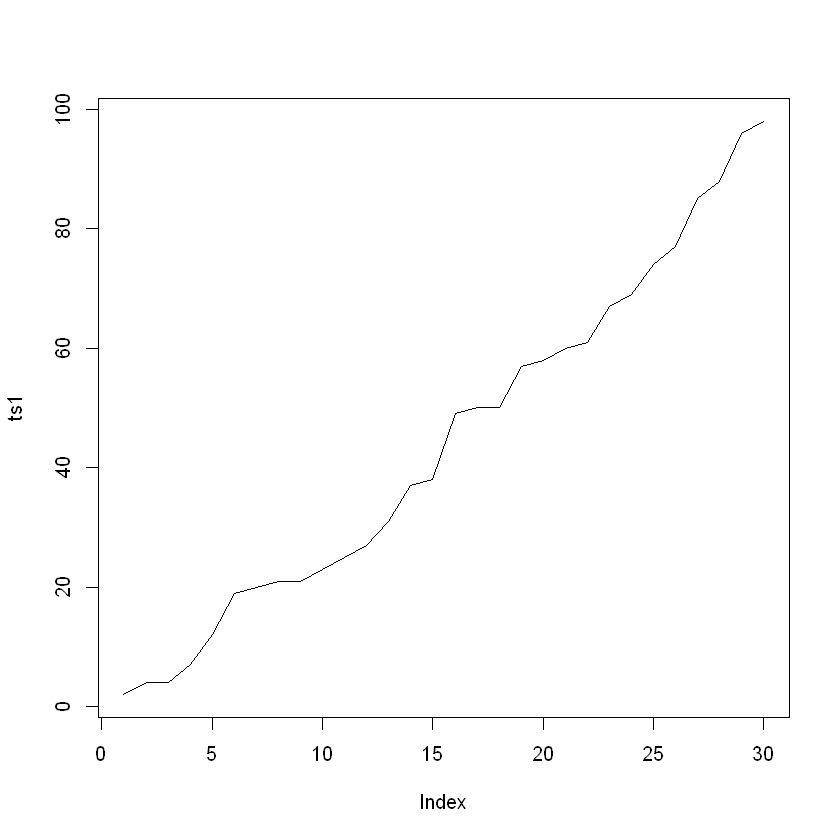

In [43]:
plot(ts1, type = 'l')

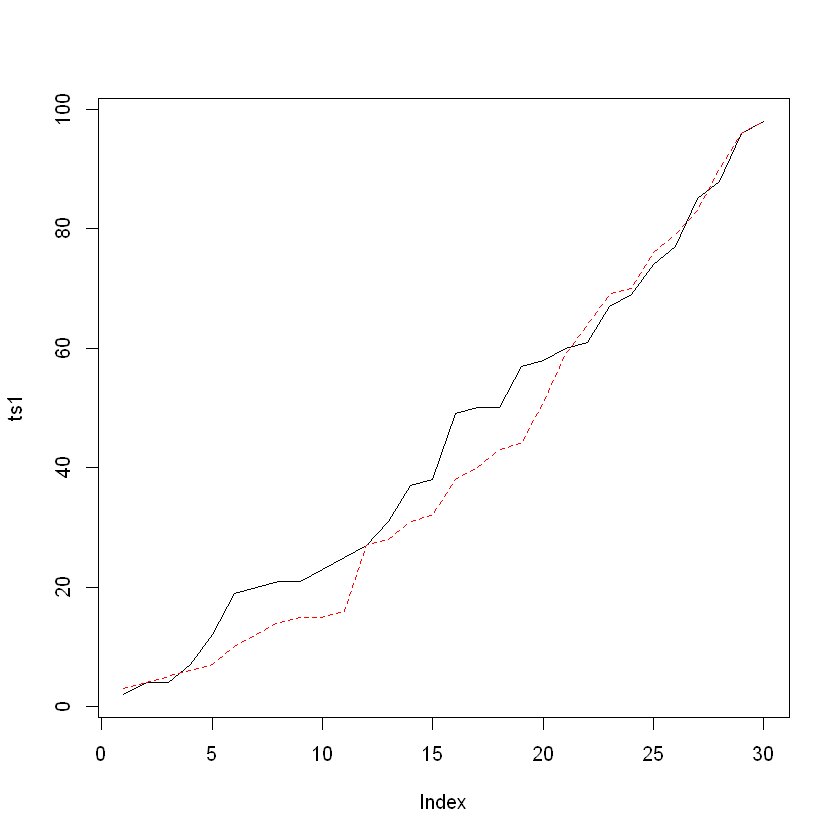

In [44]:
plot(ts1, type = 'l')
lines(ts2, lty='dashed', col='red')

In [45]:
x1 <- seq(1,100,1)
y1 <- dbinom(x1, 100, 0.25) # dbinom(v,n,p) B(n,p)이항 분포 함수 값 만들기
head(y1)

[1] 1.069067e-11 1.763961e-10 1.920758e-09 1.552613e-08 9.936720e-08
[6] 5.244380e-07

In [46]:
x2 <- seq(1,50,1)
y2 <- dbinom(x2, 50, 0.5) # dbinom(v,n,p) B(n,p)이항 분포 함수 값 만들기
head(y2)

[1] 4.440892e-14 1.088019e-12 1.740830e-11 2.045475e-10 1.881837e-09
[6] 1.411378e-08

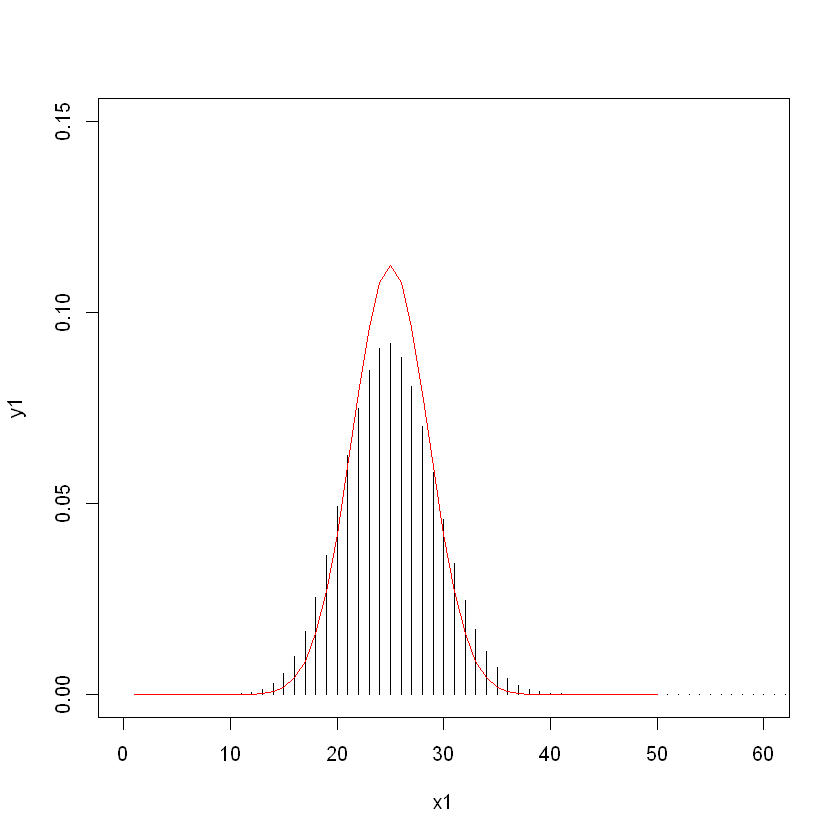

In [47]:
plot(x1, y1, type = 'h', ylim = c(0,0.15), xlim = c(0,60))
lines(x2, y2, col='red')

### 정교한 시각화로 분석하기(ggplot2)
- 객체에 담아 재사용 가능, plot() 같은 함수는 변수에 담아 재사용 불가

In [49]:
library('ggplot2')
library('ggthemes')

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"

In [50]:
g1 <- ggplot(data=diamonds, aes(x=carat, y=price, colour=clarity))
g2 <- geom_point()
g3 <- theme_wsj()

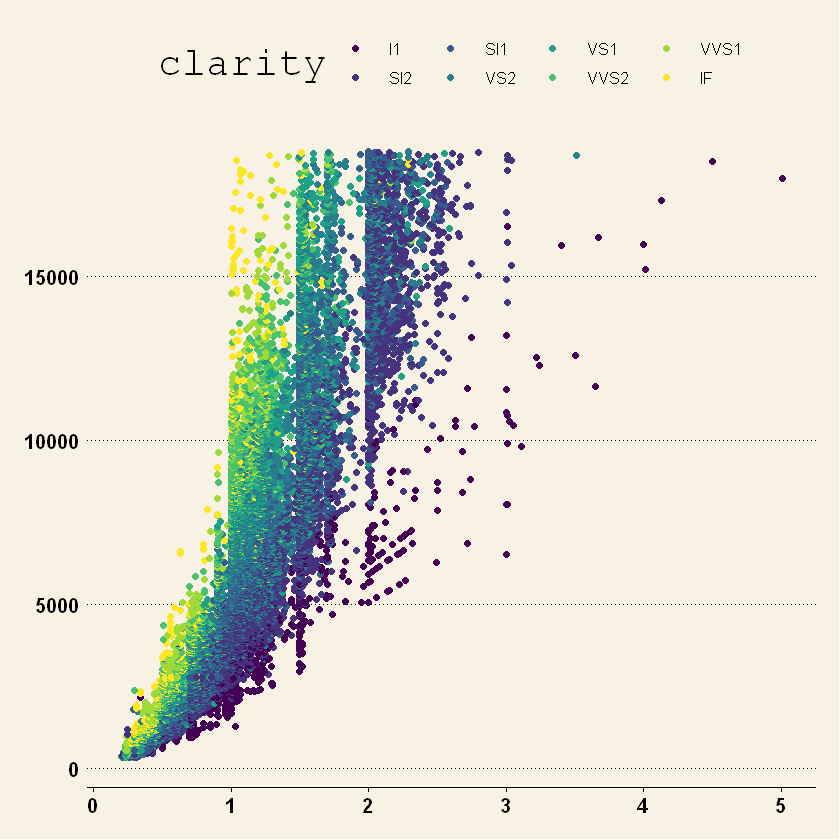

In [51]:
g1+g2+g3

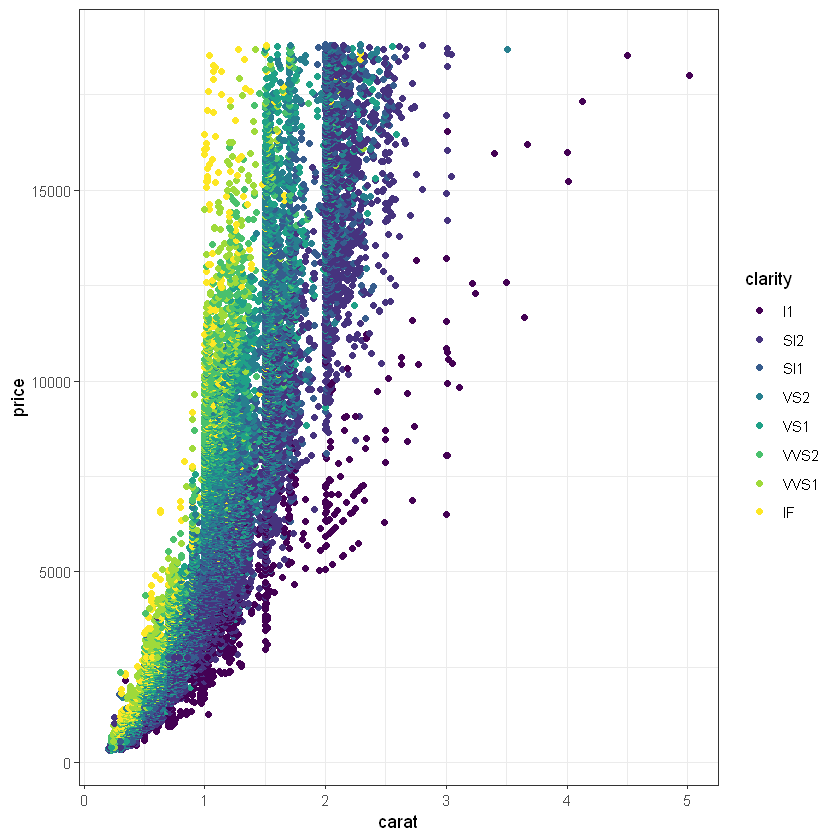

In [52]:
g1 + g2 + theme_bw()

In [53]:
df <- read.csv('r-ggagi-data/example_studentlist.csv')

In [54]:
g1 <- ggplot(df, aes(x=height, y=weight, colour=bloodtype))

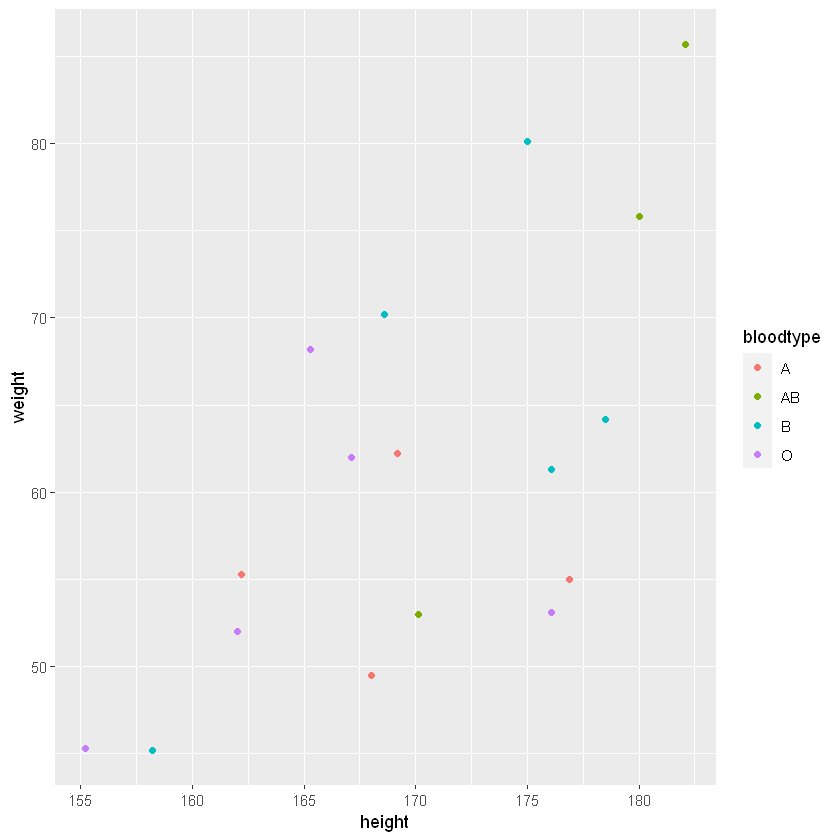

In [55]:
g1 + geom_point()

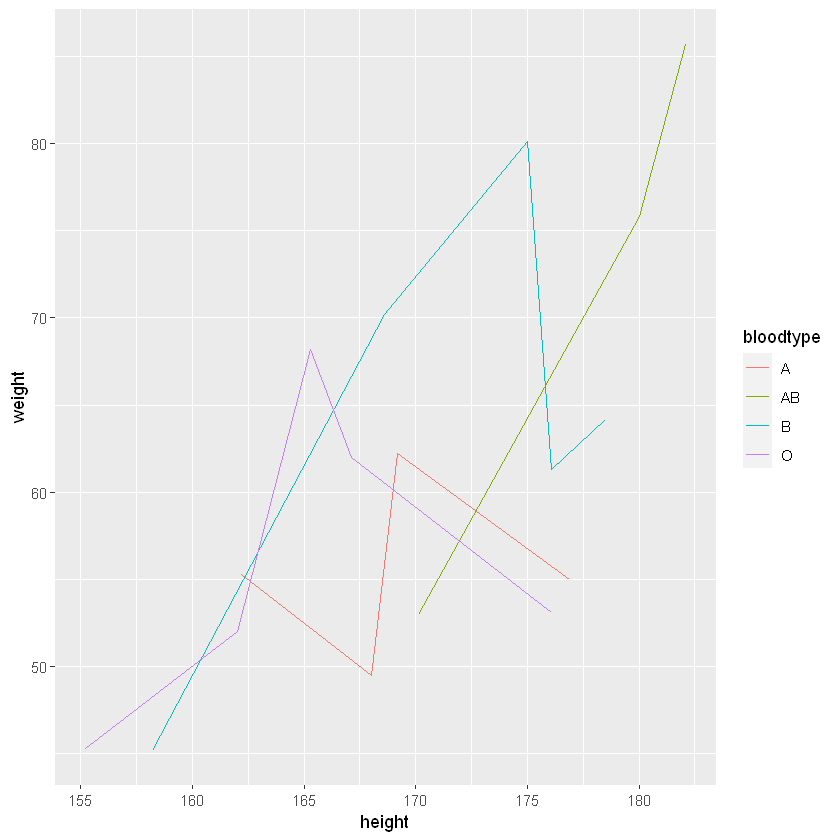

In [56]:
g1 + geom_line()

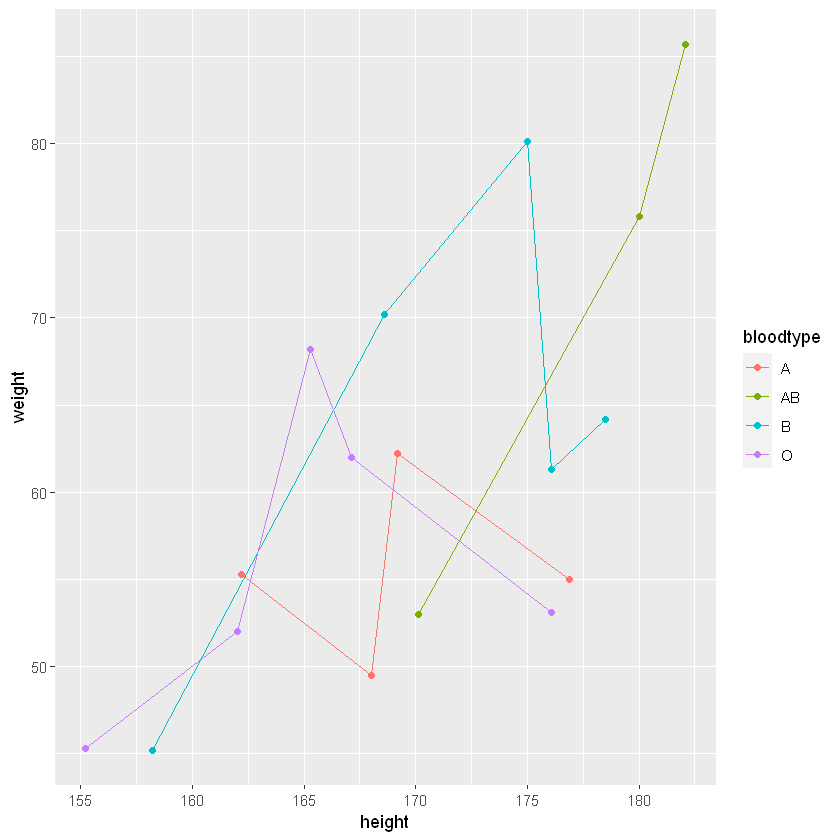

In [57]:
g1 + geom_point() + geom_line()

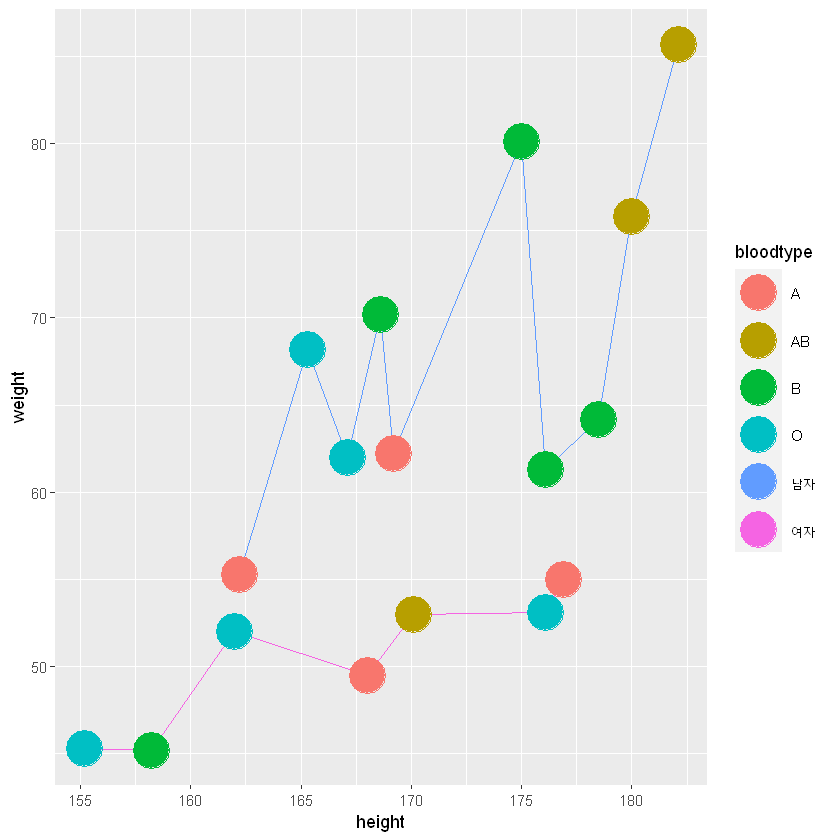

In [58]:
g1 + geom_line(aes(colour=sex)) + geom_point(size=10)

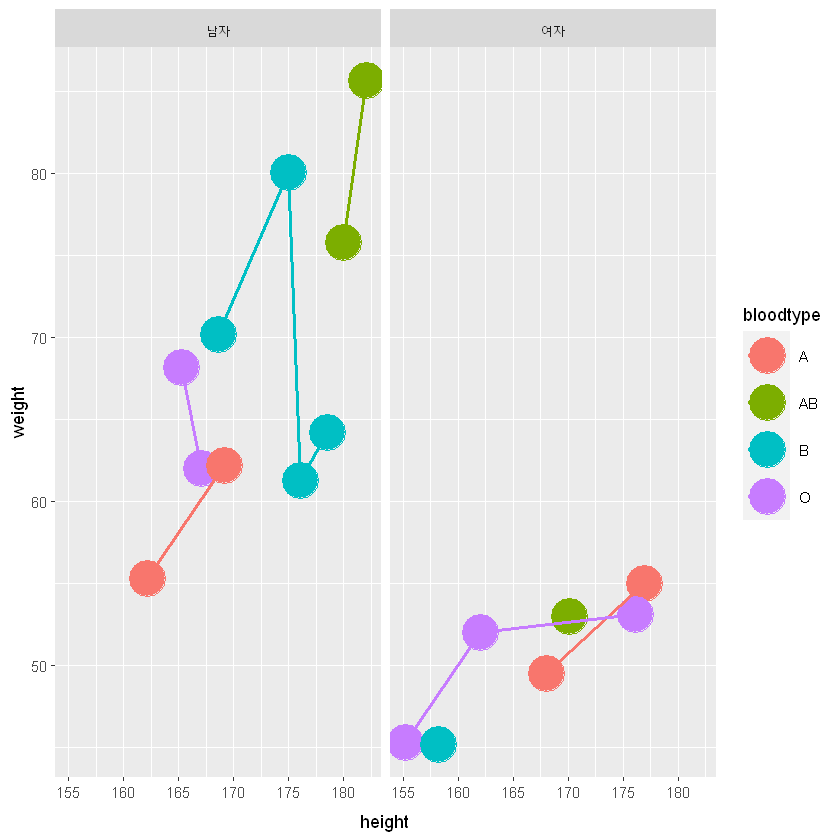

In [59]:
g1 + geom_point(size=10) + geom_line(size=1) + facet_grid(.~sex) # 성별 독립변수

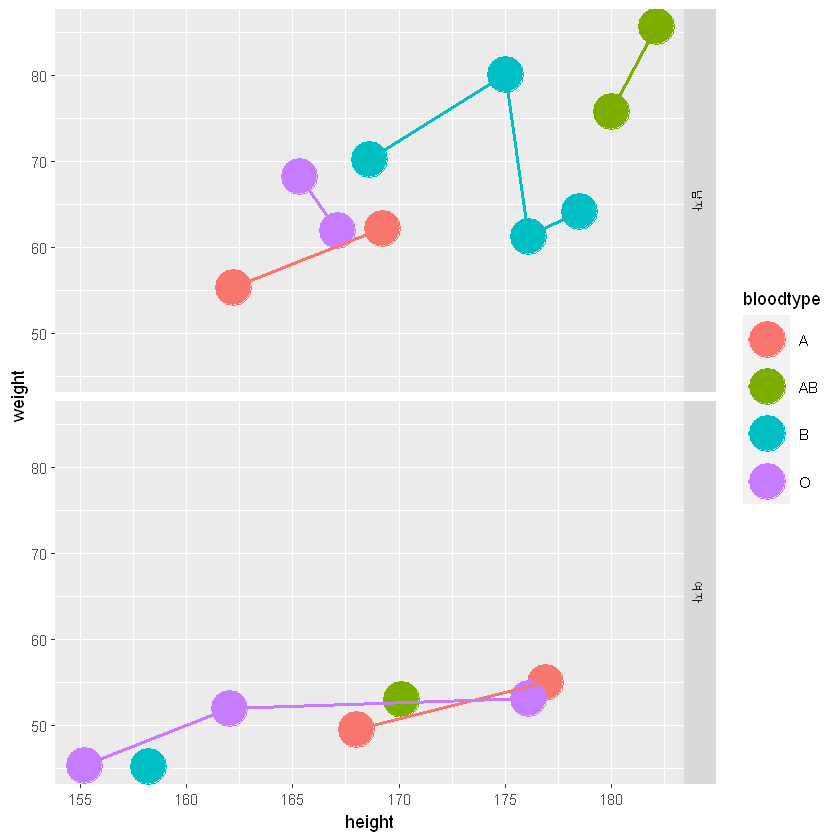

In [60]:
g1 + geom_point(size=10) + geom_line(size=1) + facet_grid(sex~.) # 성별 종속변수

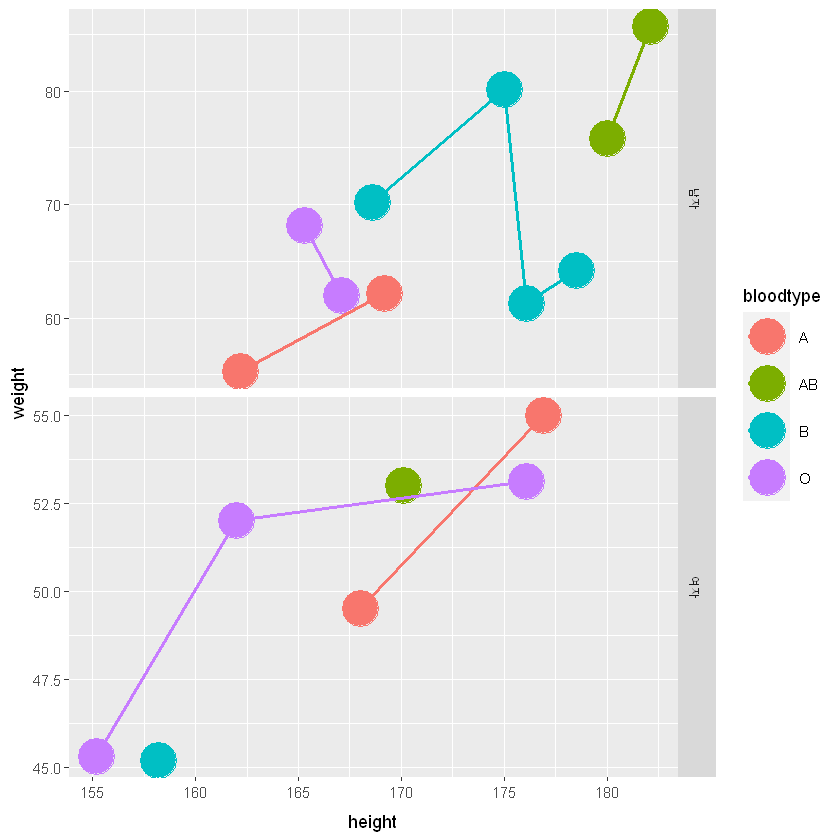

In [61]:
# y축 범위(scale) 각각 맞게 처리
g1 + geom_point(size=10) + geom_line(size=1) + facet_grid(sex~., scale='free')

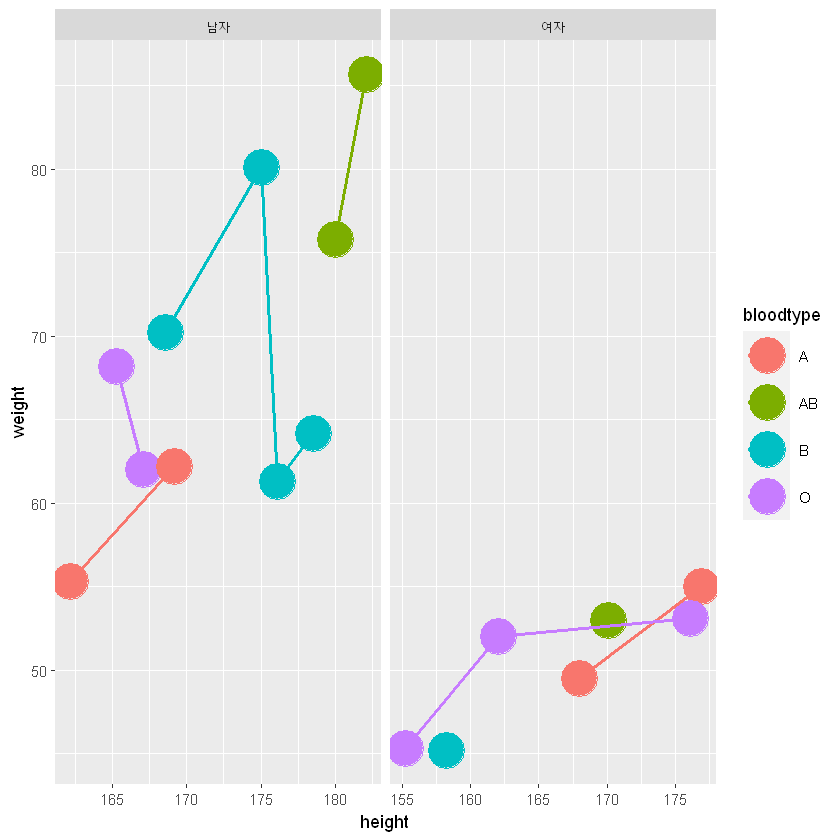

In [62]:
# y축 scale 적용 안됨
g1 + geom_point(size=10) + geom_line(size=1) + facet_grid(.~sex, scale='free') # 성별 독립변수

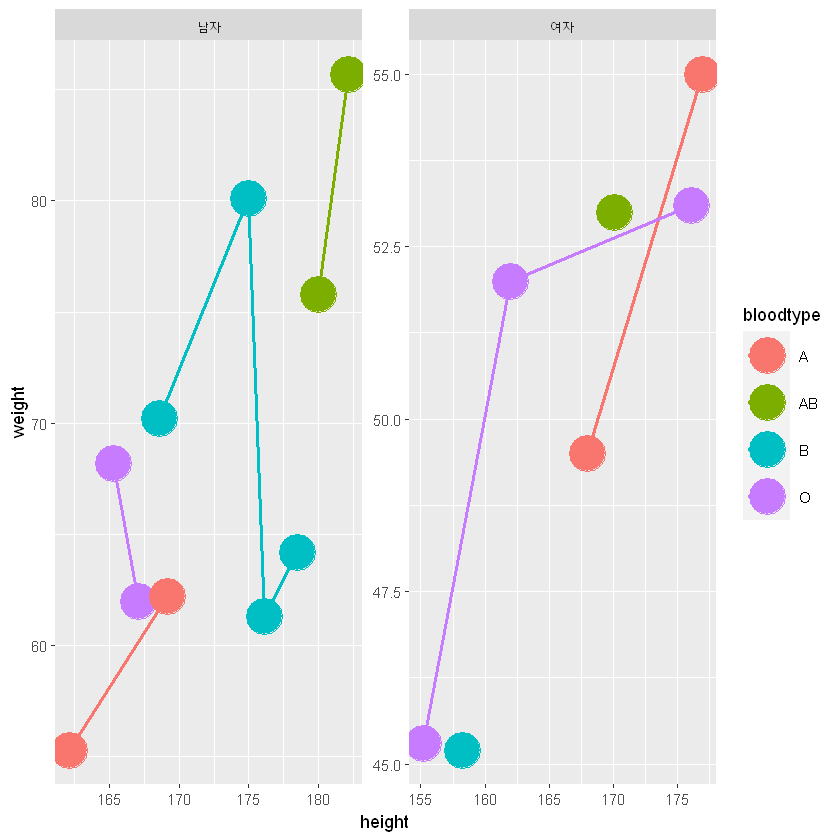

In [63]:
# y축 scale 적용
g1 + geom_point(size=10) + geom_line(size=1) + facet_wrap(~sex, scale='free') # 성별 독립변수

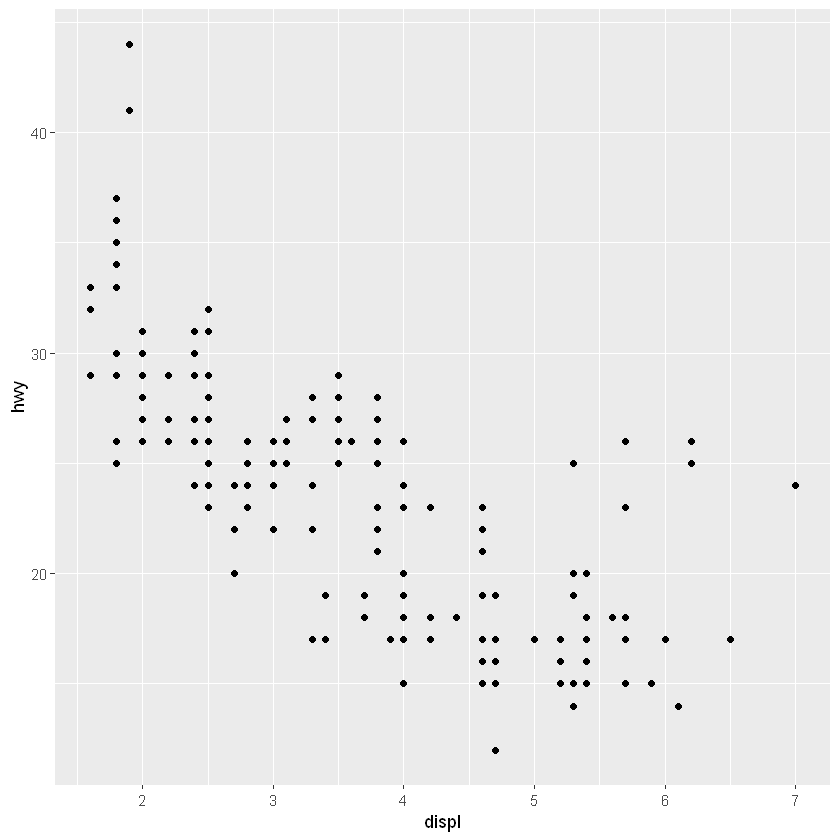

In [64]:
# facet_grid() - 명목형 변수들의 level 별 그래프를 보여주는 목적
g <- ggplot(mpg, aes(displ, hwy)) # 배기량, 고속도로연비 산점도
g + geom_point()

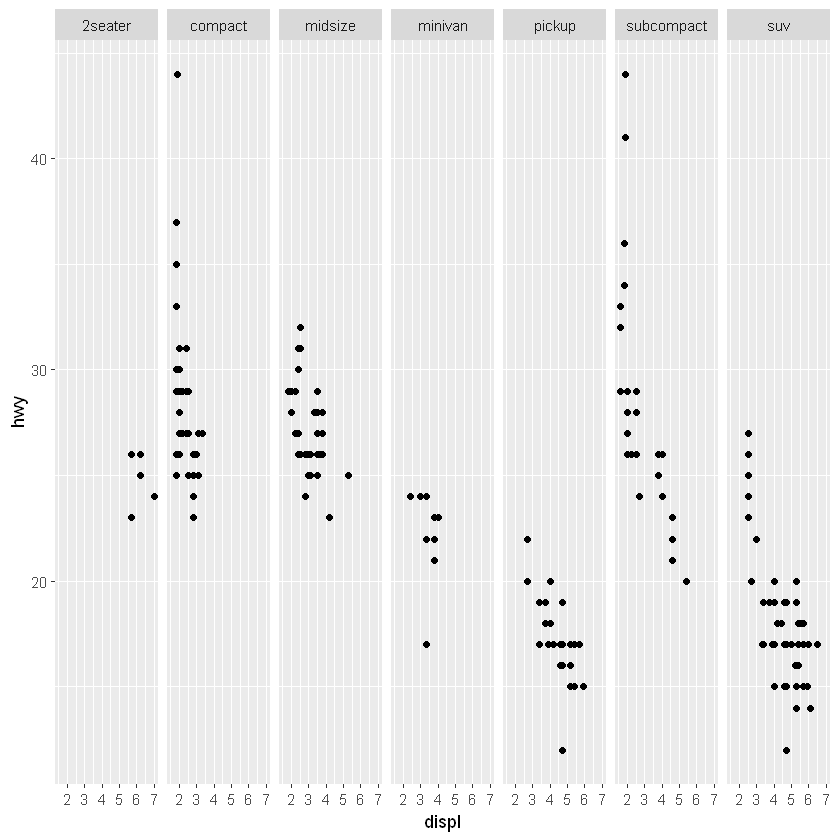

In [65]:
# 차량 종류에 따른 배기량, 고속도로연비 보기
g + geom_point() + facet_grid(.~class)

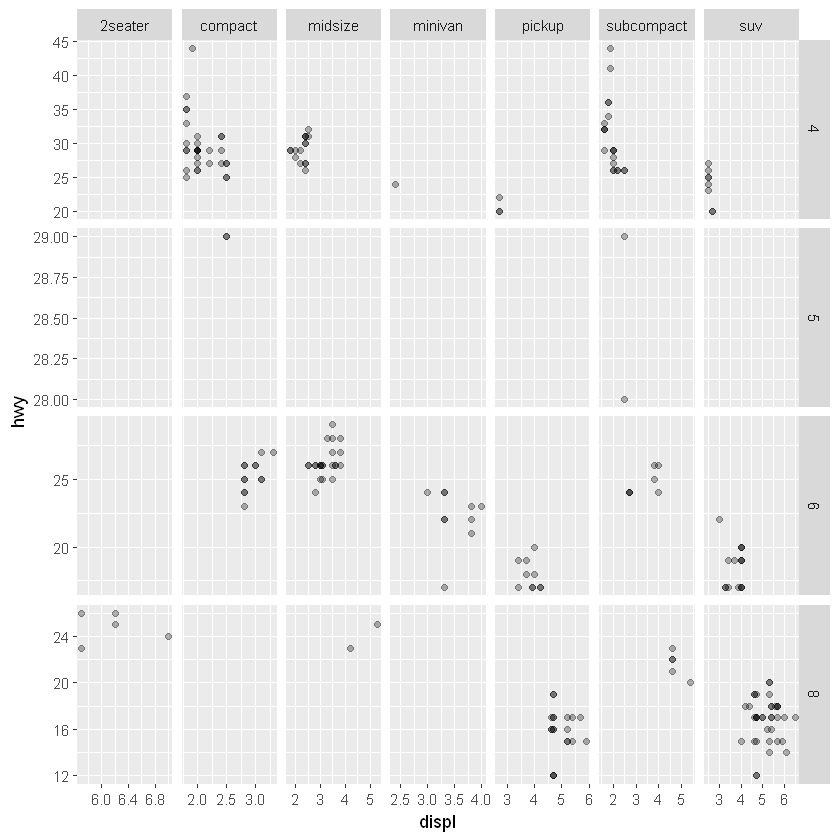

In [66]:
# 종속변수 추가
g + geom_point(alpha=.3) + facet_grid(cyl~class, scale='free')

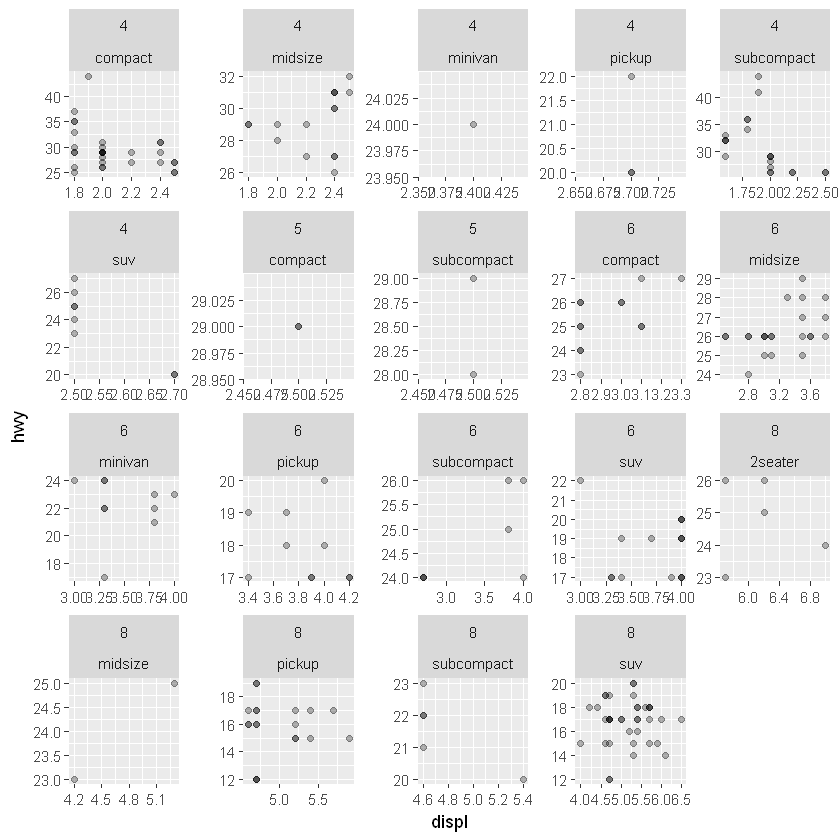

In [70]:
g + geom_point(alpha=.3) + facet_wrap(cyl~class, scale='free')

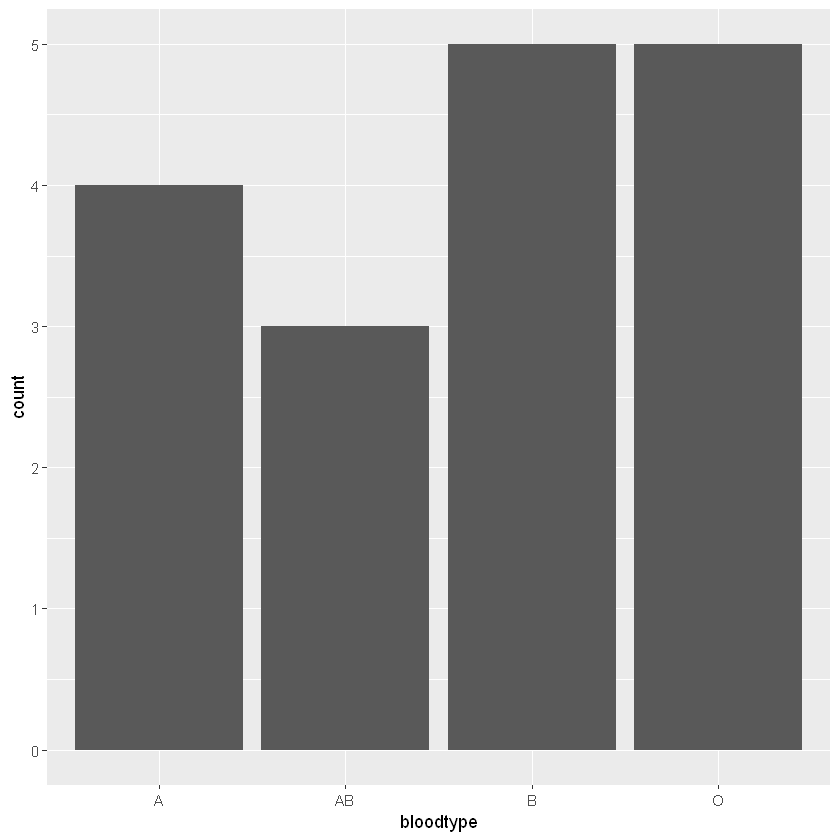

In [71]:
ggplot(df, aes(x=bloodtype)) + geom_bar()

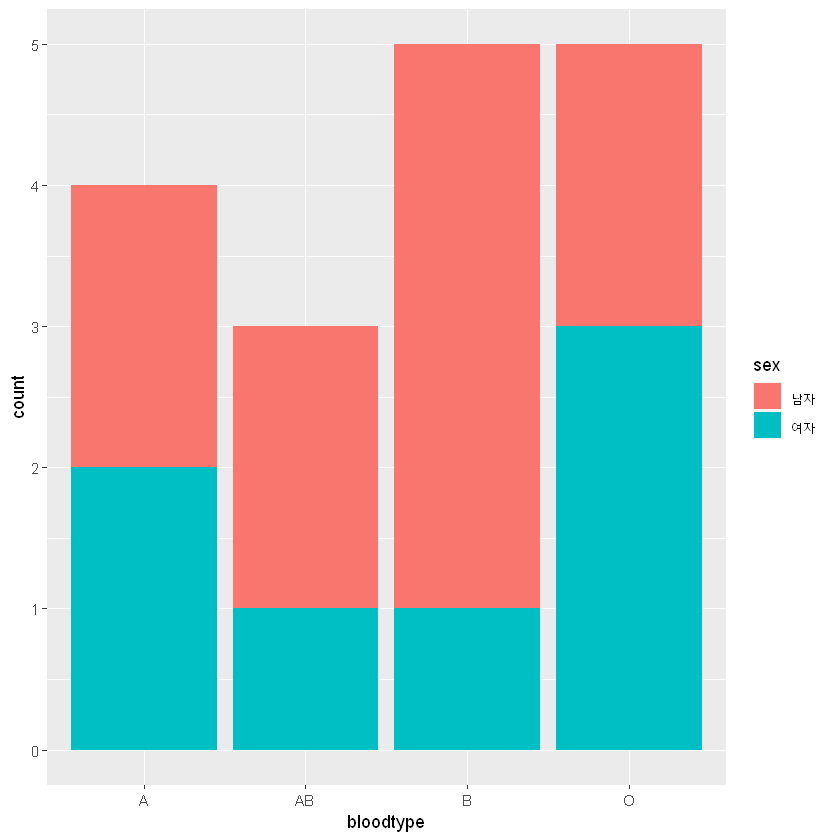

In [72]:
# Level 별 색 넣기 - fill
ggplot(df, aes(x=bloodtype, fill=sex)) + geom_bar()

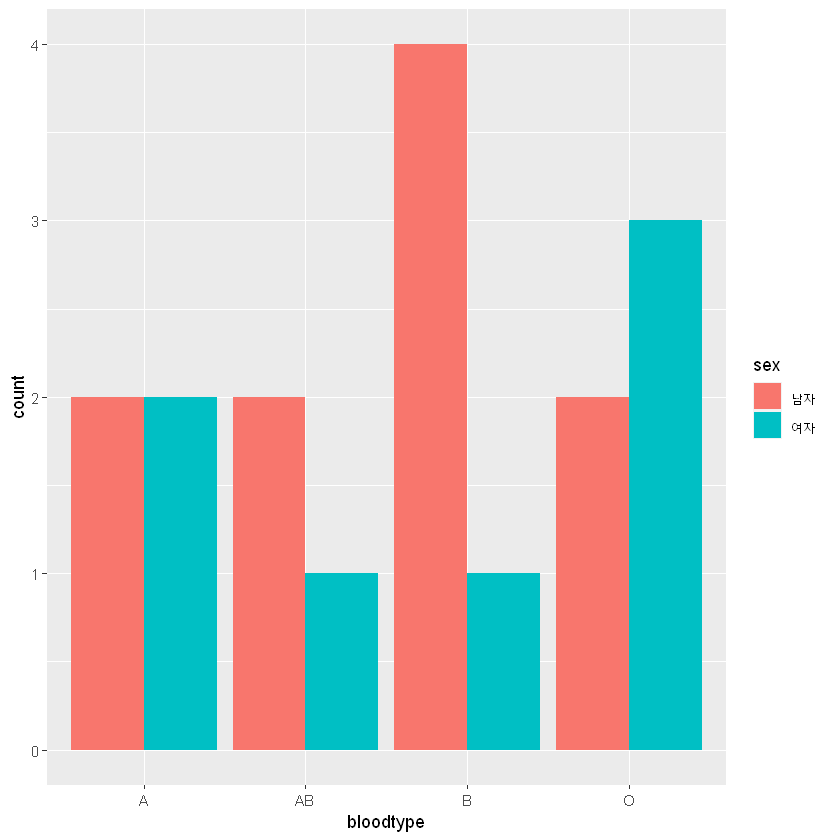

In [73]:
ggplot(df, aes(x=bloodtype, fill=sex)) + geom_bar(position = 'dodge')

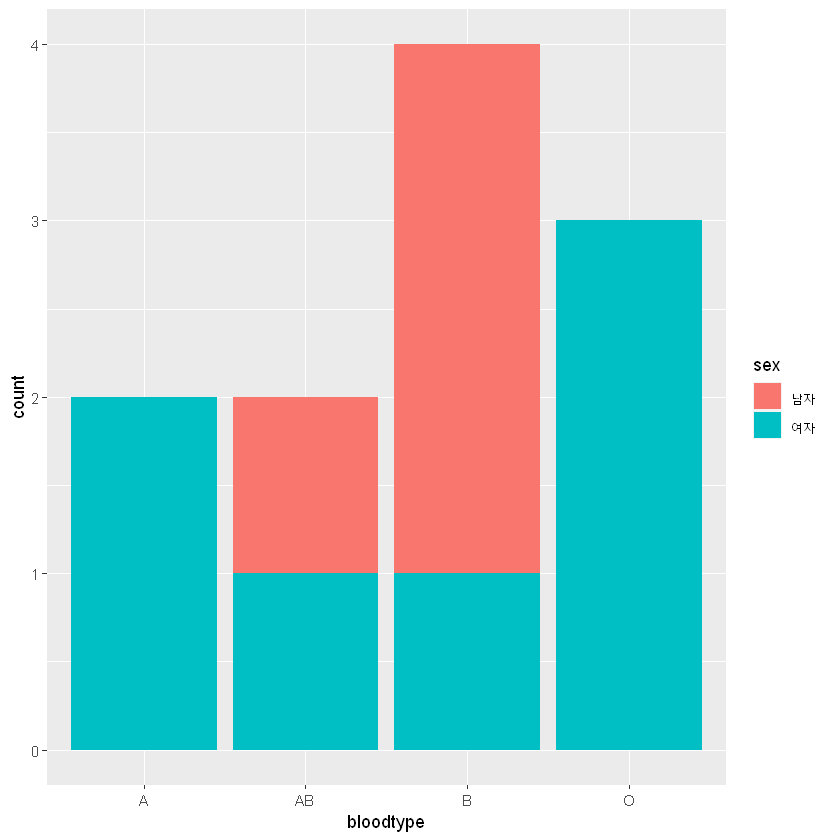

In [74]:
# Level 별 색 넣고 가각 바로 표시 - position
ggplot(df, aes(x=bloodtype, fill=sex)) + geom_bar(position = 'identity') # 누적없이 겹치기

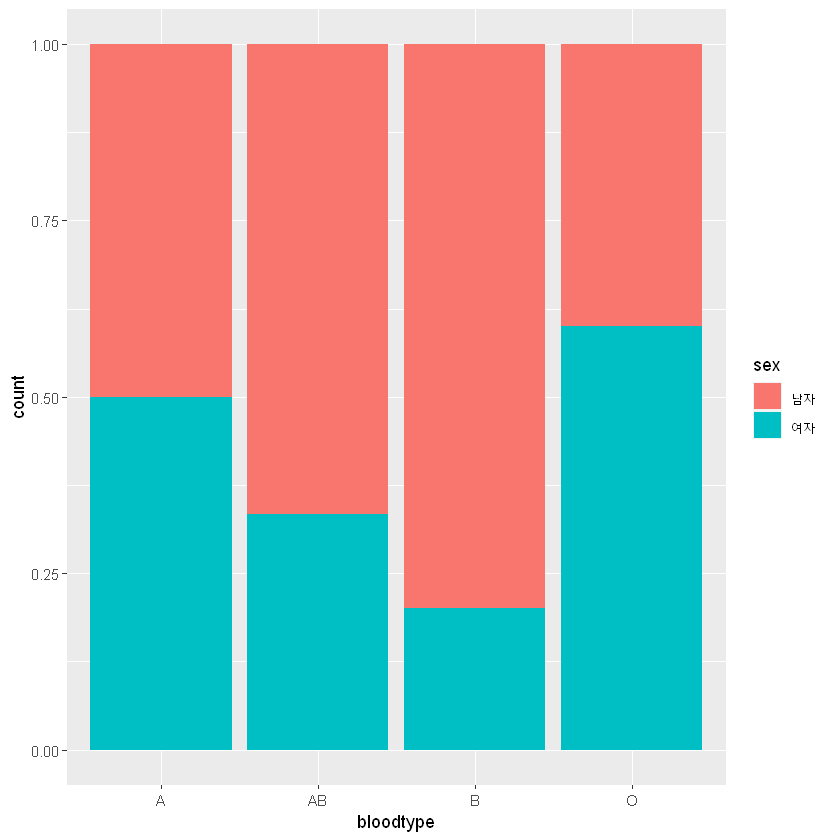

In [75]:
# Level 별 색 넣고 가각 바로 표시 - position
ggplot(df, aes(x=bloodtype, fill=sex)) + geom_bar(position = 'fill') # 비율로 표시

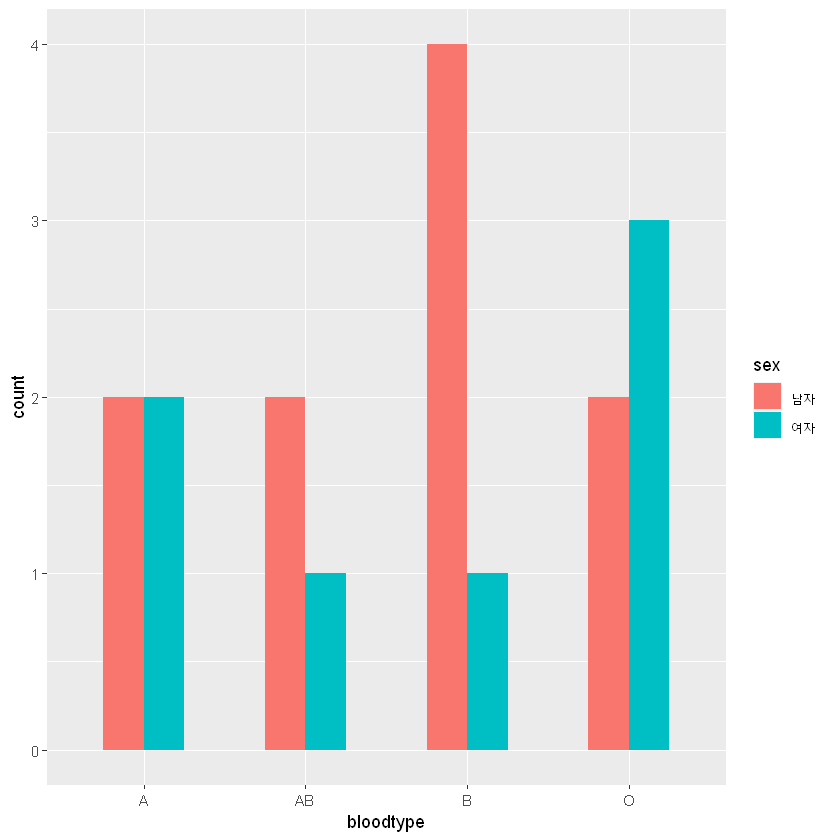

In [76]:
# 막대 넓이 바꾸기 - width
ggplot(df, aes(x=bloodtype, fill=sex)) + geom_bar(position = 'dodge', width = 0.5)

In [78]:
h_mean <- tapply(df$height, df$bloodtype, mean)
h_mean

A      AB       B       O 
169.075 177.400 171.280 165.140

In [81]:
df2 <- data.frame(h_mean)
df2$bloodtype <- rownames(df2)
rownames(df2) <- NULL

In [82]:
df2

h_mean,bloodtype
169.075,A
177.400,AB
171.280,B
165.140,O


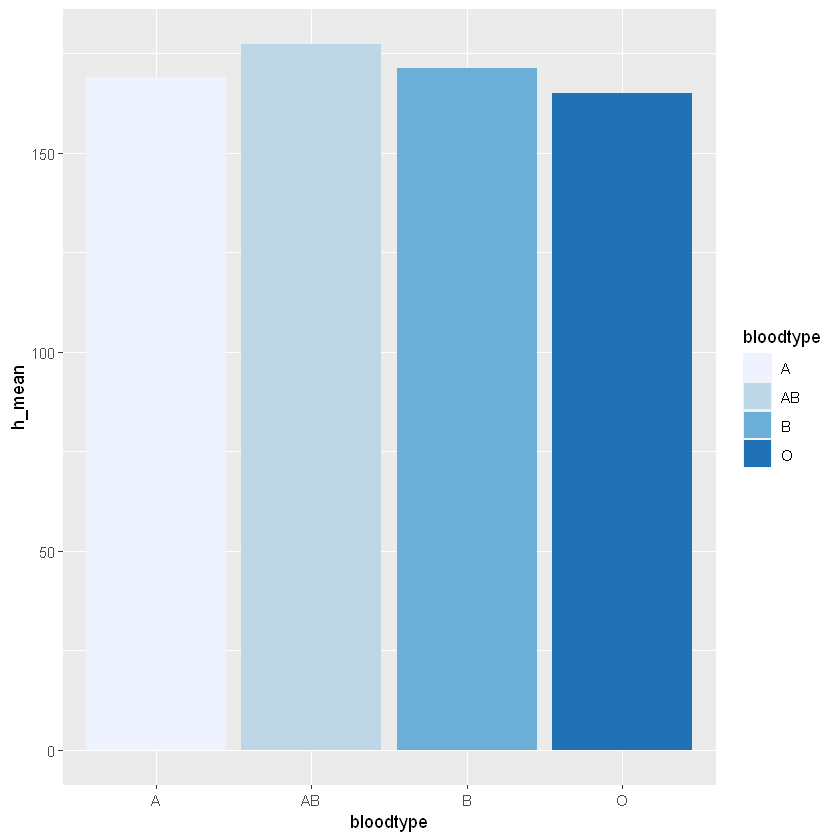

In [84]:
# stat = 'identity' 값그대로, 생략시 stat = 'bin'  빈도수 표시
ggplot(df2, aes(x=bloodtype, y=h_mean, fill=bloodtype)) +
geom_bar(stat = 'identity') +
scale_fill_brewer()

In [85]:
g1 <- ggplot(diamonds, aes(x=carat))

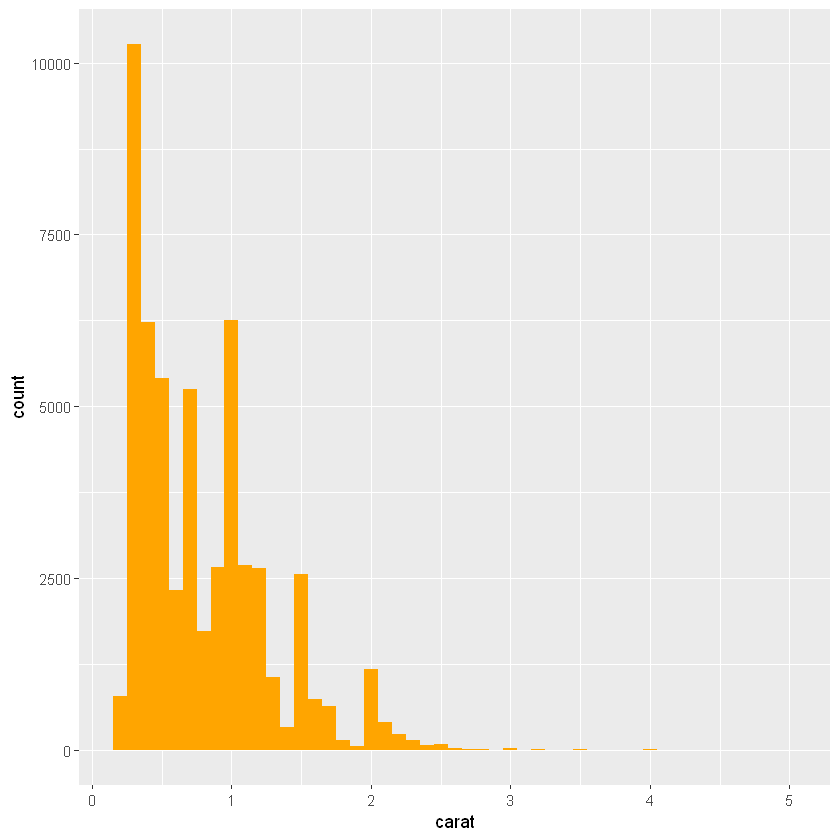

In [86]:
# y축 계급 빈도수
g1 + geom_histogram(binwidth = 0.1, fill='orange')

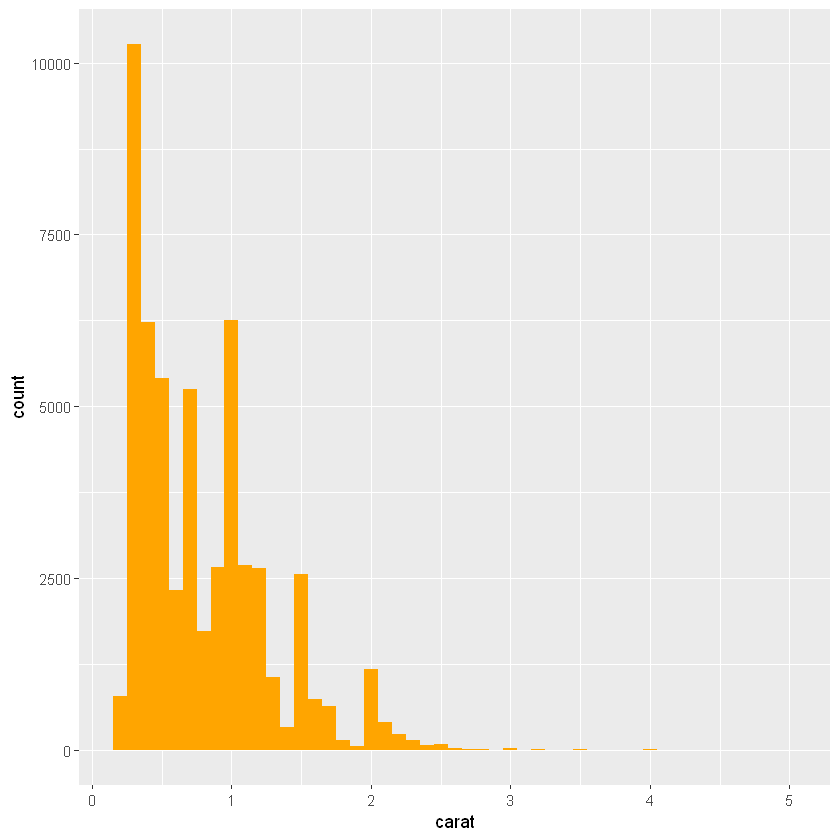

In [87]:
g1 + geom_histogram(aes(y=..count..), binwidth = 0.1, fill='orange')

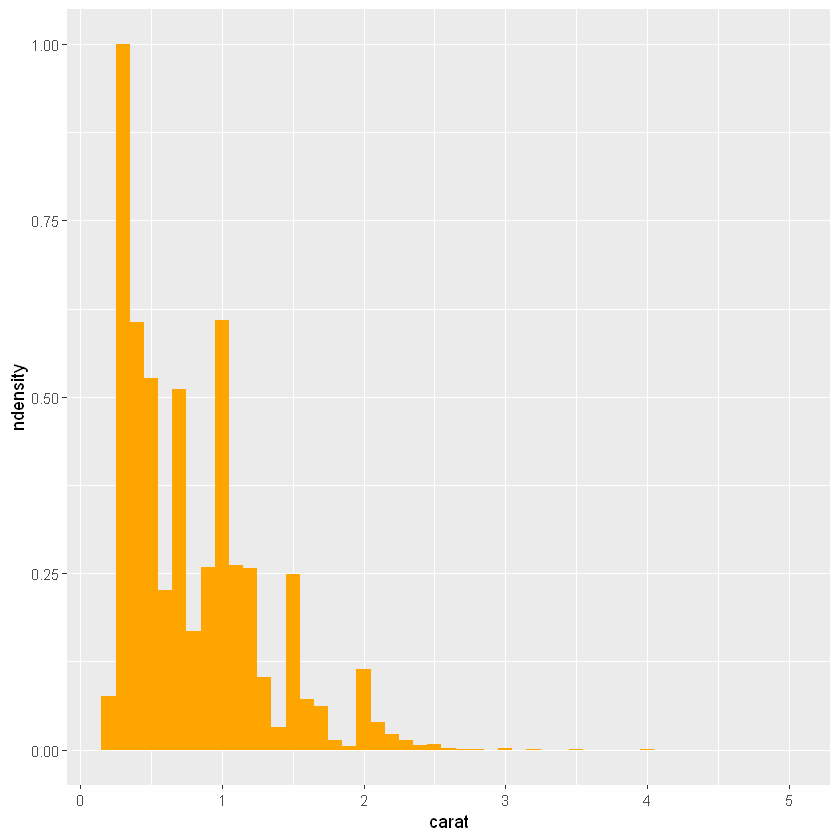

In [88]:
g1 + geom_histogram(aes(y=..ndensity..), binwidth = 0.1, fill='orange')

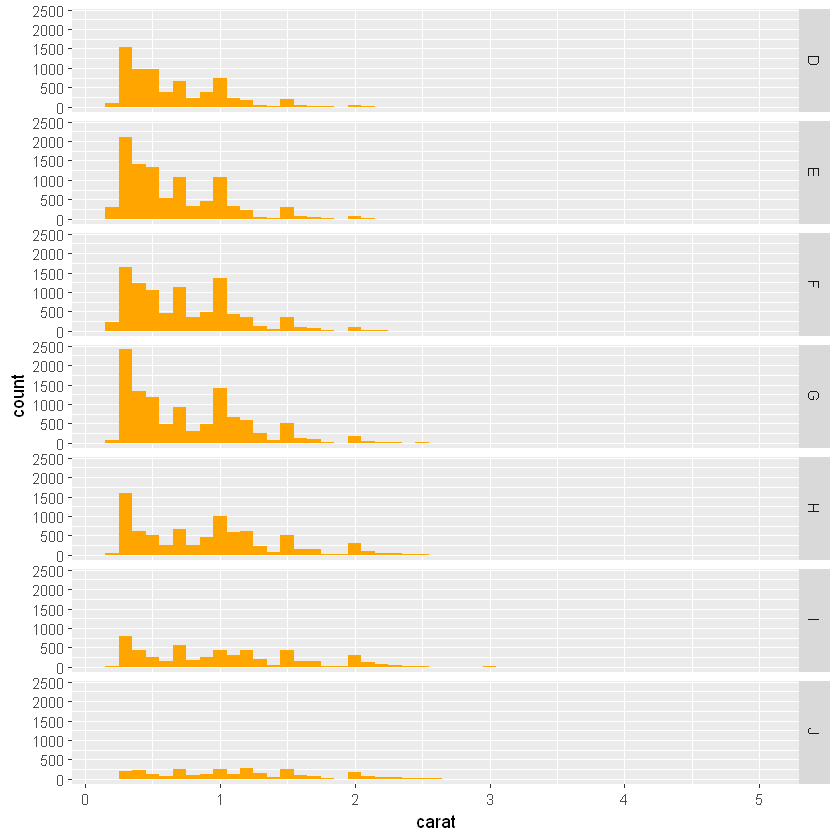

In [89]:
# 그룹별로 그리기 - facet_grid
g1 + geom_histogram(binwidth = 0.1, fill='orange') +
facet_grid(color~.) # color 변수 Level 별로

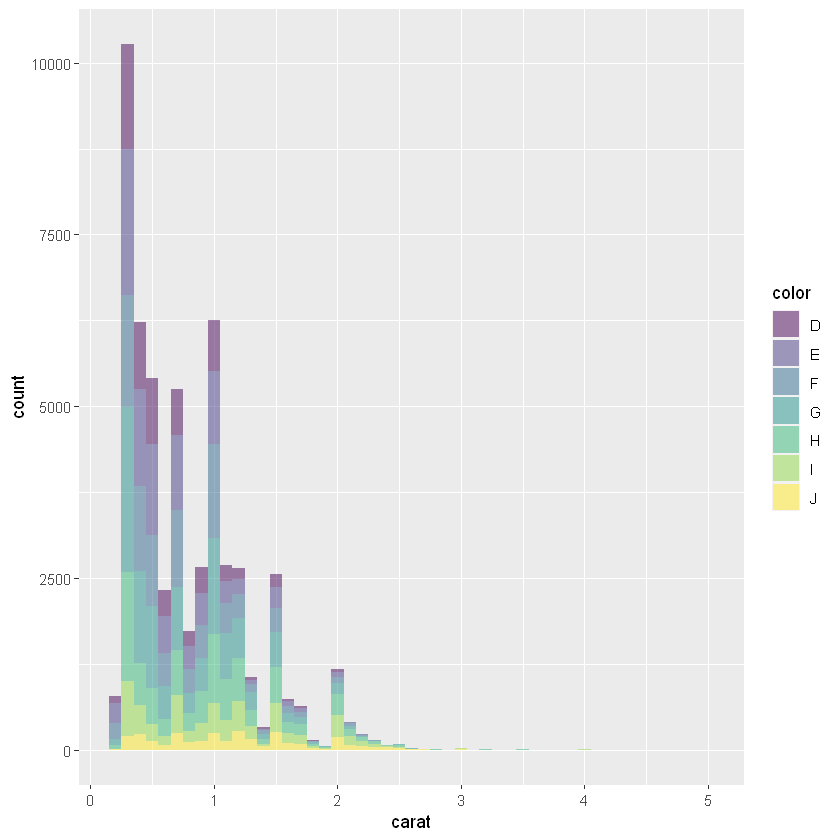

In [90]:
# Level 별로 겹처 보이기
g1 + geom_histogram(aes(fill=color), binwidth = 0.1, alpha=0.5)

In [92]:
df <- read.csv('r-ggagi-data/example_studentlist.csv')
head(df)

name,sex,age,grade,absence,bloodtype,height,weight
김길동,남자,23,3,유,O,165.3,68.2
이미린,여자,22,2,무,AB,170.1,53.0
홍길동,남자,24,4,무,B,175.0,80.1
김철수,남자,23,3,무,AB,182.1,85.7
손세수,여자,20,1,유,A,168.0,49.5
박미희,여자,21,2,무,O,162.0,52.0


In [93]:
g1 <- ggplot(df,aes(x=weight, y=height))

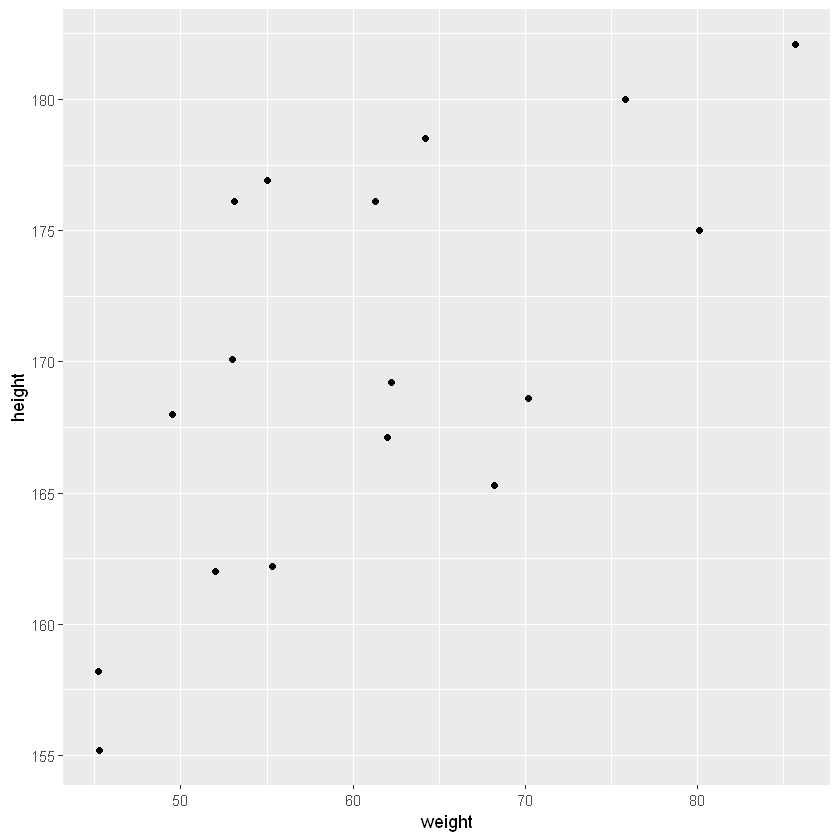

In [95]:
g1 + geom_point()

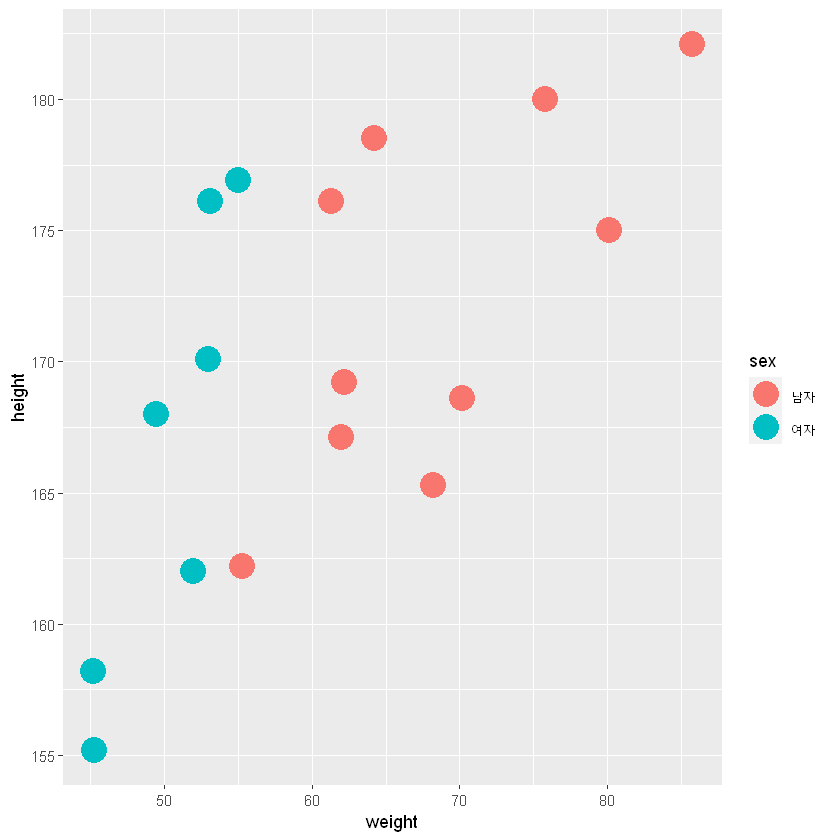

In [96]:
g1 + geom_point(aes(colour=sex), size=7)

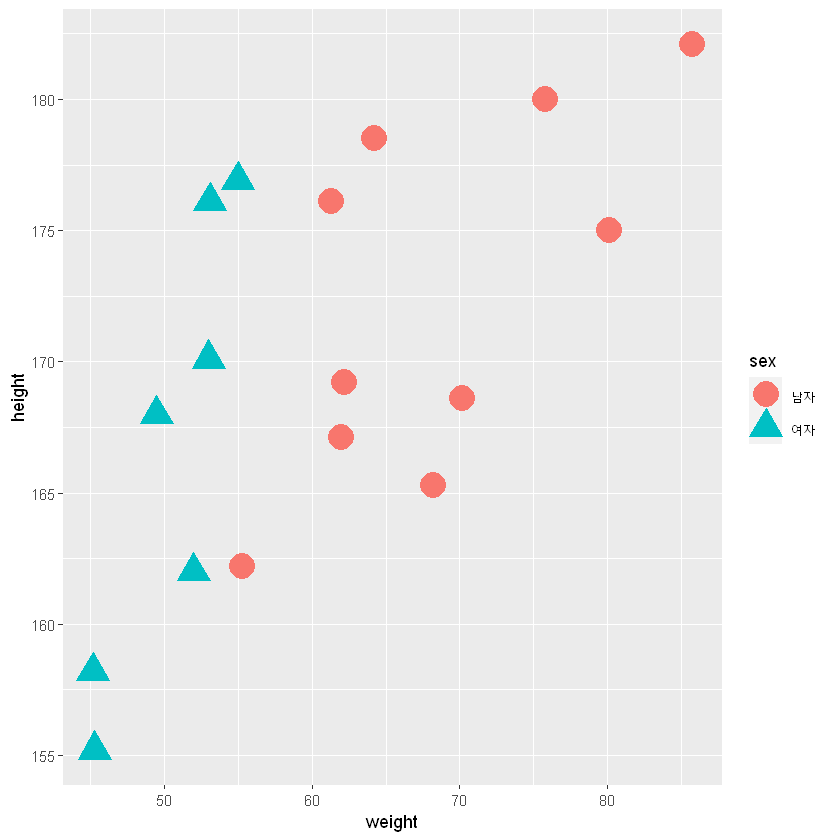

In [97]:
g1 + geom_point(aes(colour=sex, shape=sex), size=7)

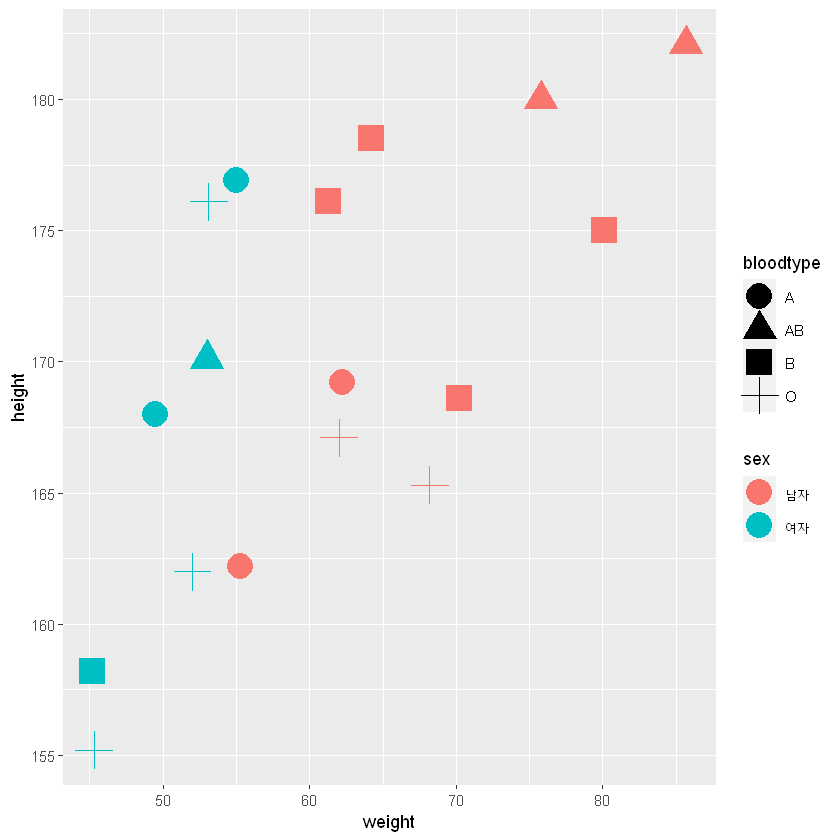

In [98]:
g1 + geom_point(aes(colour=sex, shape=bloodtype), size=7)

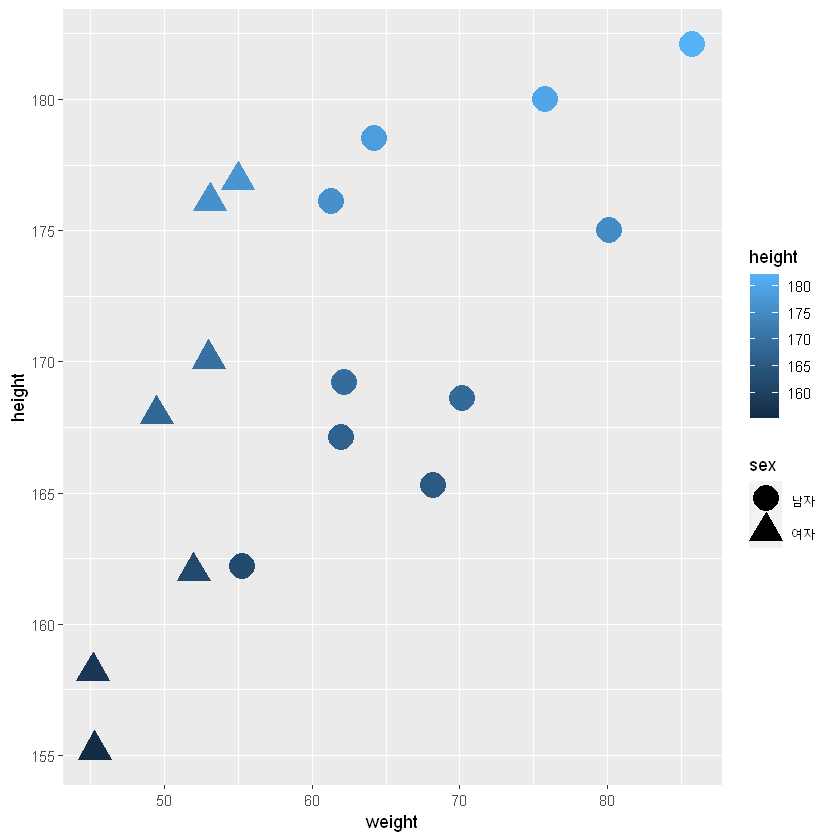

In [99]:
g1 + geom_point(aes(colour=height, shape=sex), size=7)

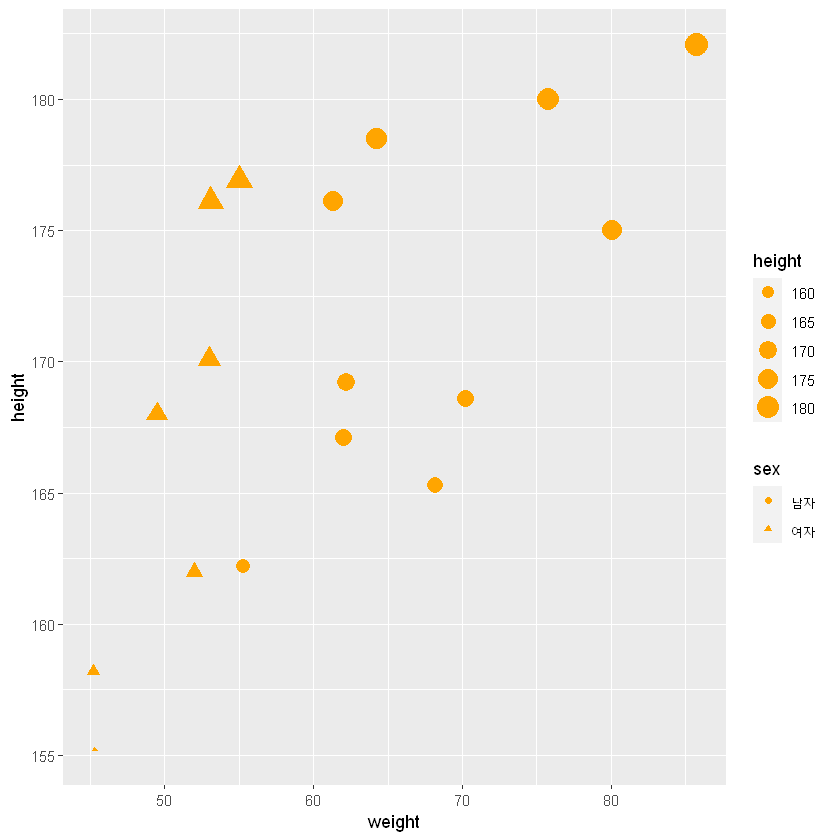

In [100]:
g1 + geom_point(aes(size=height, shape=sex), colour='orange')

`geom_smooth()` using formula 'y ~ x'


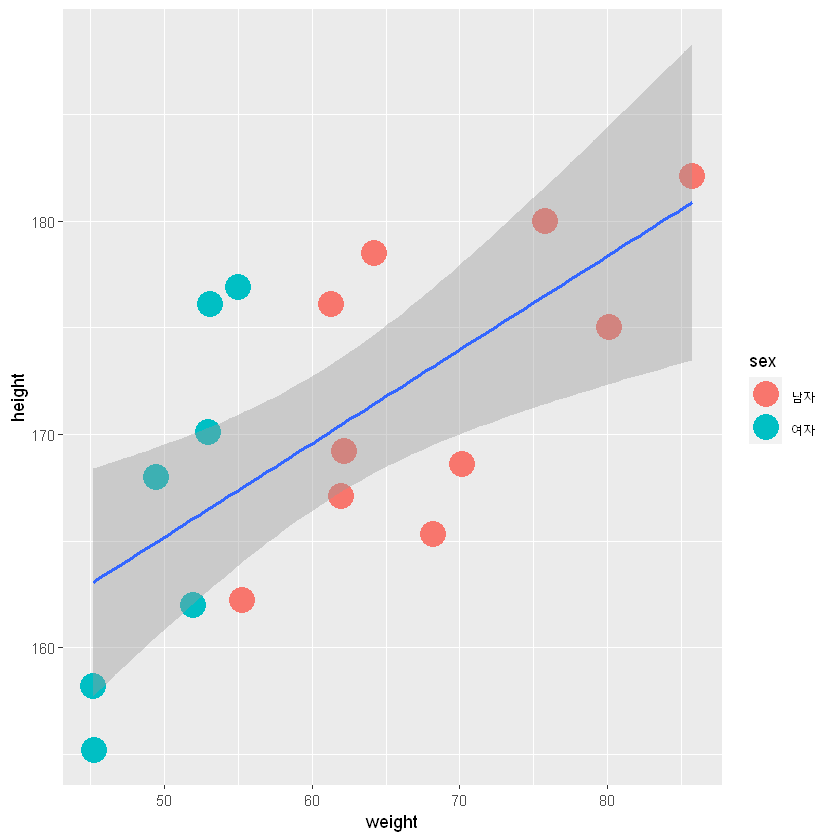

In [102]:
g1 + geom_point(aes(colour=sex), size=7) +
geom_smooth(method = 'lm')

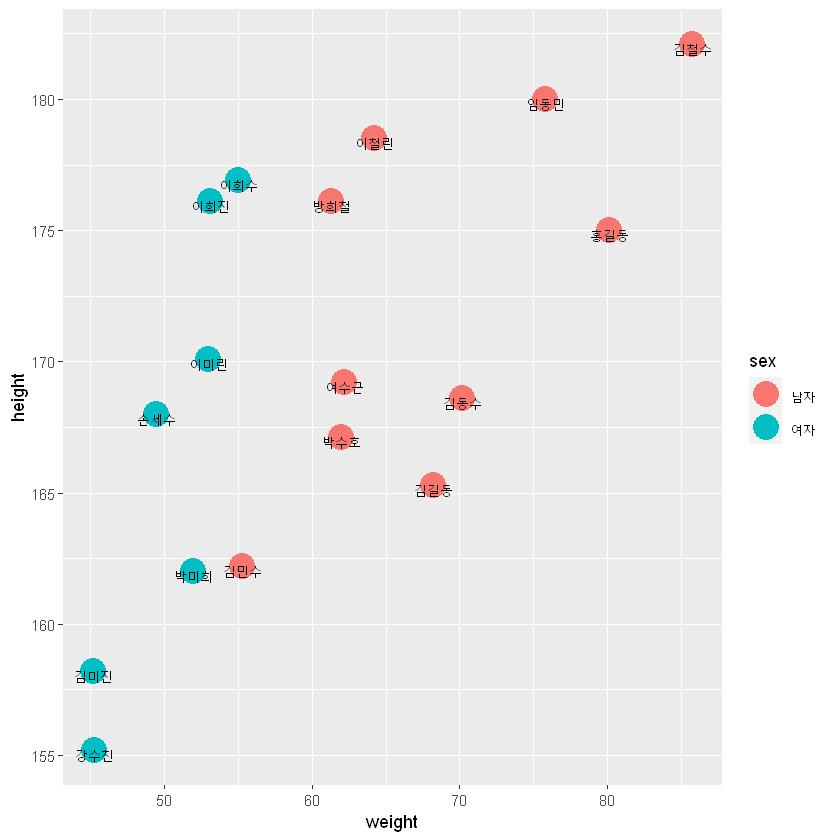

In [103]:
g1 + geom_point(aes(colour=sex), size=7) +
geom_text(aes(label=name))

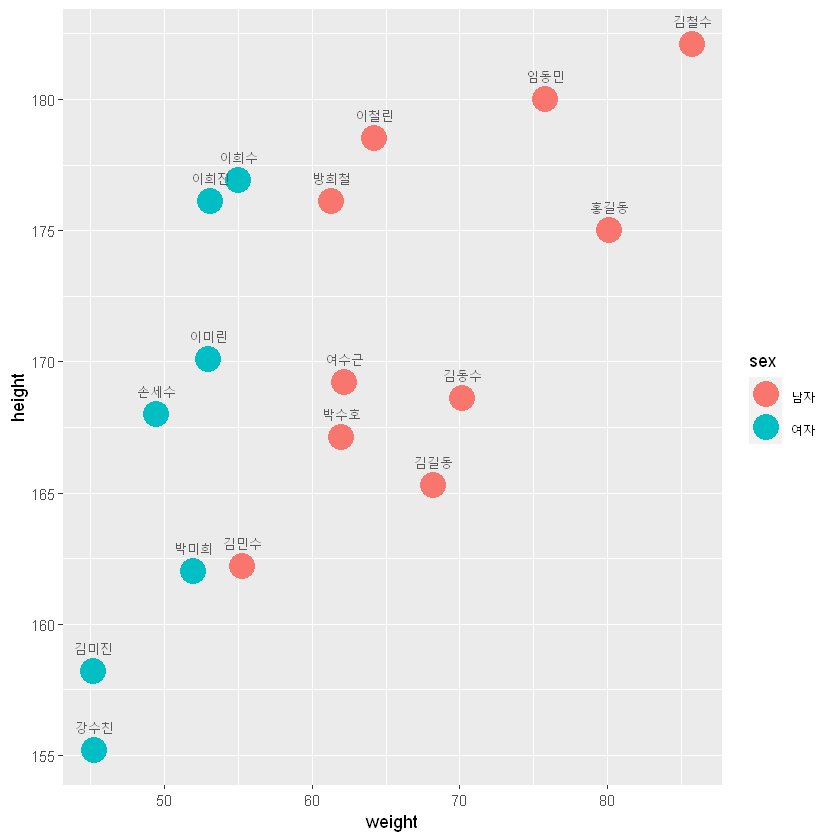

In [104]:
g1 + geom_point(aes(colour=sex), size=7) +
geom_text(aes(label=name), vjust=-1.5, colour='grey35')